_Machine Learning Dr.Aliyari_


**Masih Mokhtari**

**40211454**
****
_mini project $3$_

$Q1$

## Import Libraries

In [1]:
# At first we disable all warnings.
import warnings
warnings.filterwarnings("ignore")

# Before we start, we have to import libraries we need.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.manifold import TSNE

from sklearn import datasets
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

import imageio

random_state = 54

# Part Zero: Load Dataset

In [2]:
# Load the iris dataset from sklearn
iris = datasets.load_iris()

'''iris = load_iris()'''

# Some information about dataset
'''
feature_names':
  [
  'sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'
  ]


  ('target_names': array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# this dataset has 4 features and its target has 3 classes.

#print(iris)
#print(iris.target)
#print("\n")
#print(iris.data)

'''

# Convert the iris dataset to a pandas dataframe
# Add the target variable to the dataframe
'''iris_df['target'] = iris.target'''
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['target'] = pd.Series(iris.target)

print(f"iris dataframe shape : {iris_df.shape}")
print("\n")

df = iris_df
# Print some information about the dataframe
df.info()
print("\n")
# Print some statistical information about the dataframe
df.describe()


iris dataframe shape : (150, 5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB




sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

In [ ]:
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
145       2  
146       2  
147       2  
148       2  
149       2  

[150 rows x 5 columns]

In [ ]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [ ]:
column = 'target'
num_unique_values = df[column].nunique()
value_counts = df[column].value_counts()
print(f'The number of unique values in the column "{column}" is {num_unique_values}')
print('\n')
print(value_counts)
print('\n')
#y_train.shape
#print(y_train)

The number of unique values in the column "target" is 3


target
0    50
1    50
2    50
Name: count, dtype: int64




X and y devide

In [3]:
column_names = df.columns
column_names = column_names.to_list()
X = df.iloc[: , :4] # 4 is number of feature columns
y = df['target']

print(f'Dataframe column numbers : {len(column_names)}')

Dataframe column numbers : 5


In [ ]:
X

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

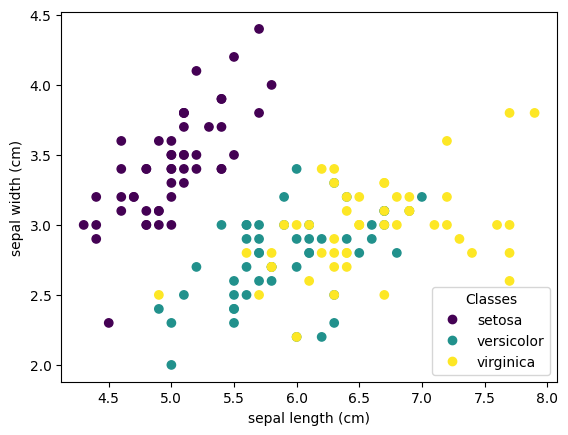

In [ ]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")

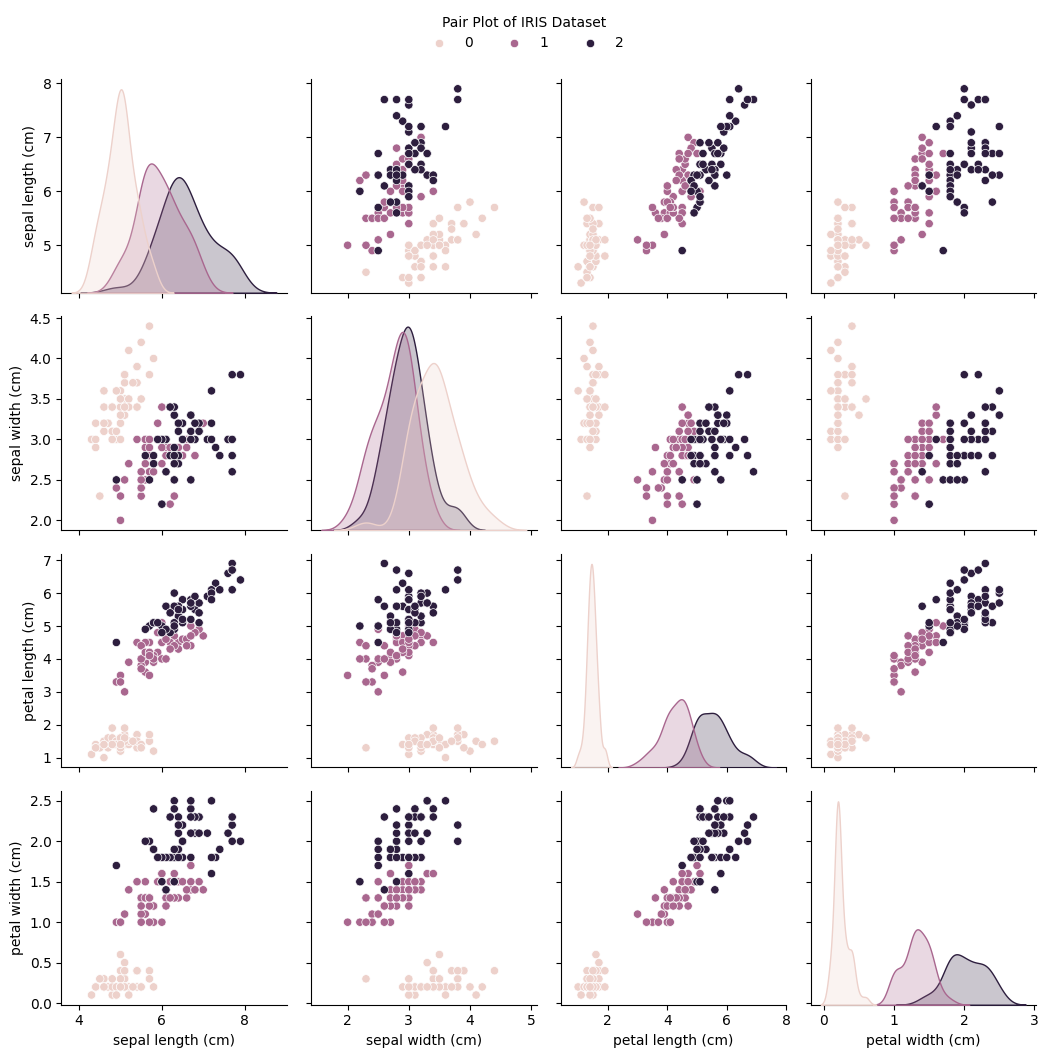

In [ ]:
ax = sns.pairplot(iris_df, hue = 'target')
sns.move_legend(ax, 'lower center', bbox_to_anchor = (.5, 1), ncol = 3, title = 'Pair Plot of IRIS Dataset', frameon = False)
plt.tight_layout()
plt.show()
print("\n")

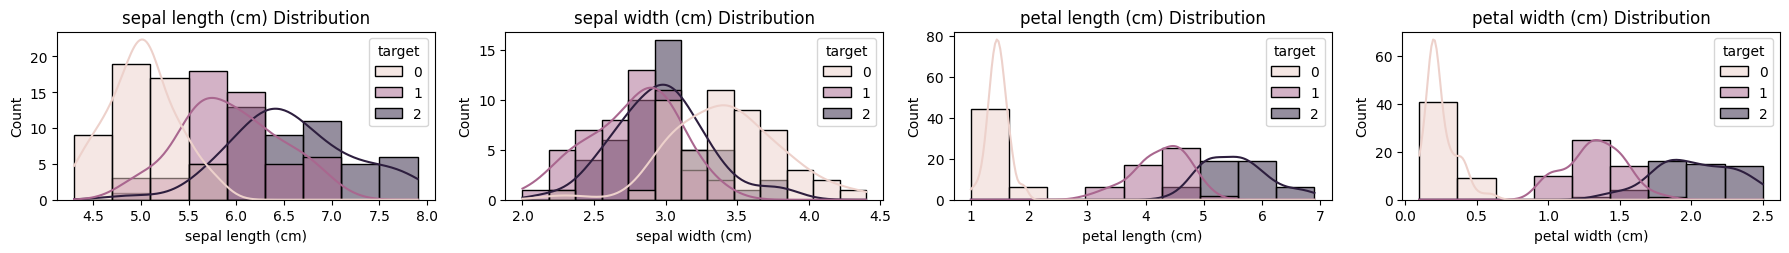

In [ ]:
plt.figure(figsize = (18 , 9))
for i, feature in enumerate(column_names[:-1]):
  plt.subplot(4, 4, i+1)
  sns.histplot(data=iris_df, x=feature, hue='target', kde=True)
  plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

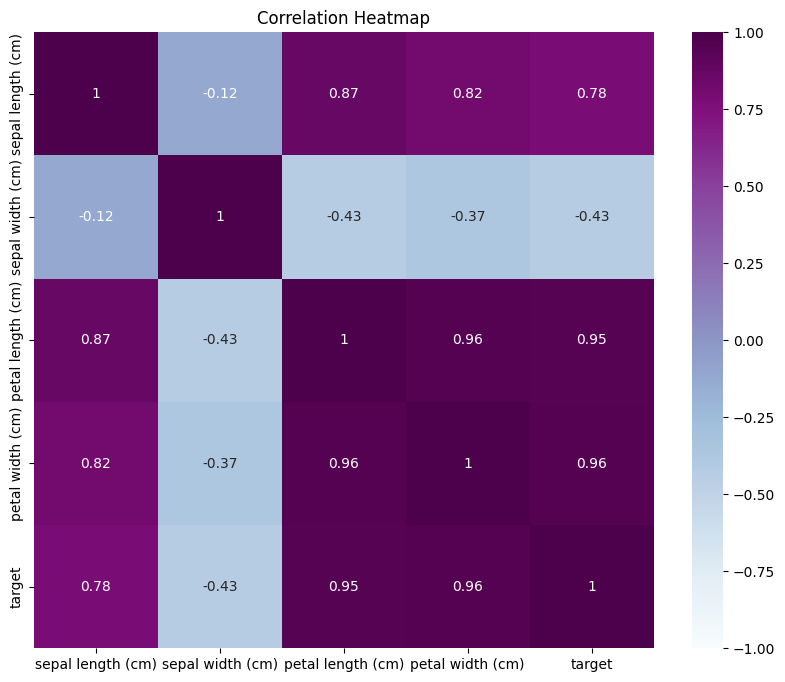

In [ ]:
corr = df.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values, cmap = "BuPu", vmin = -1, vmax = 1, annot = True)
plt.title("Correlation Heatmap")
plt.show()

Cvariance Matrix of features is : 

 [[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


Cvariance Matrix of features is : 

 [[ 0.686 -0.042  1.274  0.516]
 [-0.042  0.19  -0.33  -0.122]
 [ 1.274 -0.33   3.116  1.296]
 [ 0.516 -0.122  1.296  0.581]]




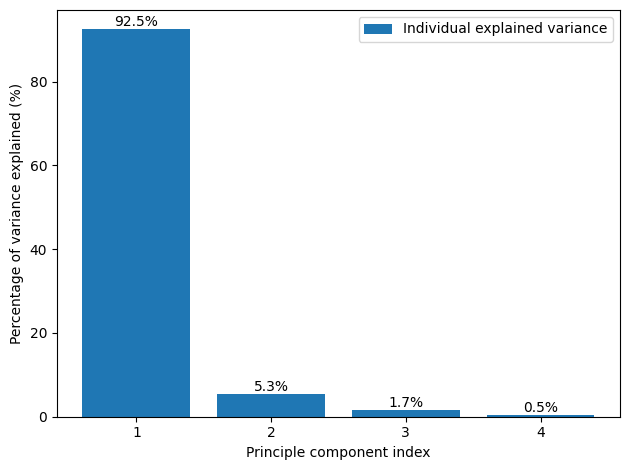

In [ ]:
cov_mat = np.cov(X.T)
rounded_matrix_1 = np.round(cov_mat, 3)
print(f'Cvariance Matrix of features is : \n\n {cov_mat}\n\n')
print(f'Cvariance Matrix of features is : \n\n {rounded_matrix_1}\n\n')

eig_val, eig_vec = np.linalg.eig(cov_mat)
exp_var = []

# Sort the eigenvalues in descending order
eig_val = np.sort(eig_val)[::-1]

for i in eig_val:
  var = (i/np.sum(eig_val))*100
  exp_var.append(var)

bar = plt.bar(range(1,5), exp_var, align='center', label='Individual explained variance')

# Add Data labels to the top of bars
for i, bar in enumerate(bar):
  plt.text(bar.get_x()+bar.get_width()/2, bar.get_height(), f'{exp_var[i]:.1f}%', ha='center', va='bottom')


plt.ylabel('Percentage of variance explained (%)')
plt.xlabel('Principle component index')
plt.xticks(ticks = list(range(1,5)))
plt.legend(loc = 'best')
plt.tight_layout()

## Preprocess

Train Test Split (Shuffled)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = random_state)

In [5]:
X_train

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
10                 5.4               3.7                1.5               0.2
100                6.3               3.3                6.0               2.5
43                 5.0               3.5                1.6               0.6
51                 6.4               3.2                4.5               1.5
93                 5.0               2.3                3.3               1.0
..                 ...               ...                ...               ...
23                 5.1               3.3                1.7               0.5
15                 5.7               4.4                1.5               0.4
130                7.4               2.8                6.1               1.9
69                 5.6               2.5                3.9               1.1
111                6.4               2.7                5.3               1.9

[120 rows x 4 columns]

Normalization

In [6]:
SC = StandardScaler()
X_train_scaled = SC.fit_transform(X_train)
X_test_scaled = SC.transform(X_test)

# Part1: Diemnsion Reduction for Visualization purpose

### t_SNE

In [ ]:
tsne_model = TSNE(n_components = 2, random_state = random_state)
tsne_Data = tsne_model.fit_transform(X_train)

**Plot t-SNE**

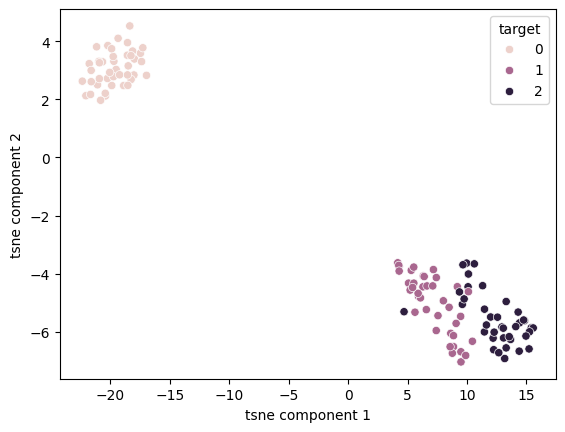

In [ ]:
tsne_df = pd.DataFrame(data = tsne_Data, columns = ['tsne component 1', 'tsne component 2'])
#tsne_df = pd.DataFrame(data = tsne_Data, columns = ['tsne_component_1', 'tsne_component_2', 'tsne_component_3'])
#tsne_df = pd.DataFrame(data = tsne_Data, columns = ['tsne_component_1', 'tsne_component_2', 'tsne_component_3', 'tsne_component_4'])

tsne_df.reset_index(drop = True, inplace= True)
y_train.reset_index(drop = True, inplace= True)

final_tsne_df = tsne_df
final_tsne_df['target'] = y_train.reset_index(drop=True)

ax = sns.scatterplot(x=final_tsne_df.iloc[:,0], y = final_tsne_df.iloc[:,1], hue = 'target', data = final_tsne_df, legend = True)
plt.show()

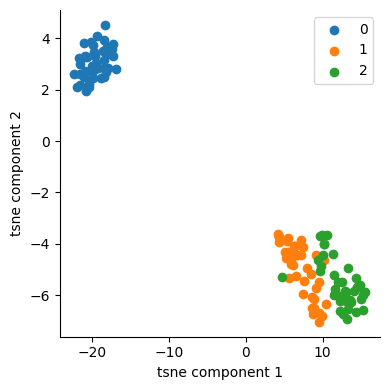

In [ ]:
sns.FacetGrid(final_tsne_df, hue='target', height = 4 ).map(plt.scatter,'tsne component 1', 'tsne component 2')
plt.legend(loc = 'upper right')

In [ ]:
final_tsne_df

tsne component 1  tsne component 2  target
0          -21.069899          2.500411       0
1           13.171977         -6.919317       2
2          -20.204557          3.850448       0
3            8.634969         -6.052815       1
4            4.286838         -3.749807       1
..                ...               ...     ...
115        -19.886440          3.740593       0
116        -22.349482          2.624888       0
117         14.762406         -5.594462       2
118          5.426590         -4.474444       1
119         11.472219         -5.221149       2

[120 rows x 3 columns]

### PCA

Cvariance Matrix of features is : 

 [[ 1.00840336 -0.11086956  0.8689964   0.80581632]
 [-0.11086956  1.00840336 -0.43896805 -0.37381252]
 [ 0.8689964  -0.43896805  1.00840336  0.97019319]
 [ 0.80581632 -0.37381252  0.97019319  1.00840336]]


Cvariance Matrix of features is : 

 [[ 1.008 -0.111  0.869  0.806]
 [-0.111  1.008 -0.439 -0.374]
 [ 0.869 -0.439  1.008  0.97 ]
 [ 0.806 -0.374  0.97   1.008]]




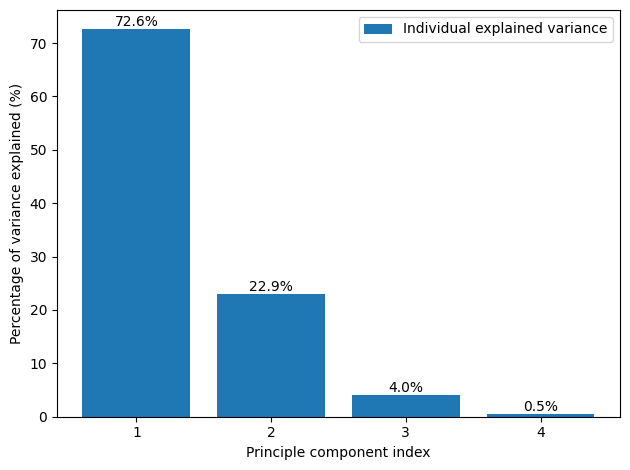

In [ ]:
cov_mat = np.cov(X_train_scaled.T)
rounded_matrix_1 = np.round(cov_mat, 3)
print(f'Cvariance Matrix of features is : \n\n {cov_mat}\n\n')
print(f'Cvariance Matrix of features is : \n\n {rounded_matrix_1}\n\n')

eig_val, eig_vec = np.linalg.eig(cov_mat)
exp_var = []

# Sort the eigenvalues in descending order
eig_val = np.sort(eig_val)[::-1]

for i in eig_val:
  var = (i/np.sum(eig_val))*100
  exp_var.append(var)

bar = plt.bar(range(1,5), exp_var, align='center', label='Individual explained variance')

# Add Data labels to the top of bars
for i, bar in enumerate(bar):
  plt.text(bar.get_x()+bar.get_width()/2, bar.get_height(), f'{exp_var[i]:.1f}%', ha='center', va='bottom')


plt.ylabel('Percentage of variance explained (%)')
plt.xlabel('Principle component index')
plt.xticks(ticks = list(range(1,5)))
plt.legend(loc = 'best')
plt.tight_layout()

In [ ]:
pca_model = PCA(n_components = 2 , random_state = random_state)
pca_train = pca_model.fit_transform(X_train_scaled)
pca_test = pca_model.transform(X_test_scaled)

In [ ]:
cov_mat_after_FE = np.cov(pca_train.T)
print(f'Cvariance Matrix of features is : \n\n {cov_mat_after_FE}\n\n')

epsilon = 1e-3

# Replace elements smaller than epsilon with zeros
new_cov_matrix = np.where(cov_mat_after_FE < epsilon, 0, cov_mat_after_FE)
rounded_matrix_2 = np.round(cov_mat_after_FE, 3)
# Print the modified matrix
print(new_cov_matrix)
print('\n')
print(f'Covariance Matrix after feature Extraction is :\n{rounded_matrix_2}\n')

Cvariance Matrix of features is : 

 [[2.92673127e+00 3.15024171e-16]
 [3.15024171e-16 9.25190477e-01]]


[[2.92673127 0.        ]
 [0.         0.92519048]]


Covariance Matrix after feature Extraction is :
[[2.927 0.   ]
 [0.    0.925]]



**Plot PCA (2 components)**

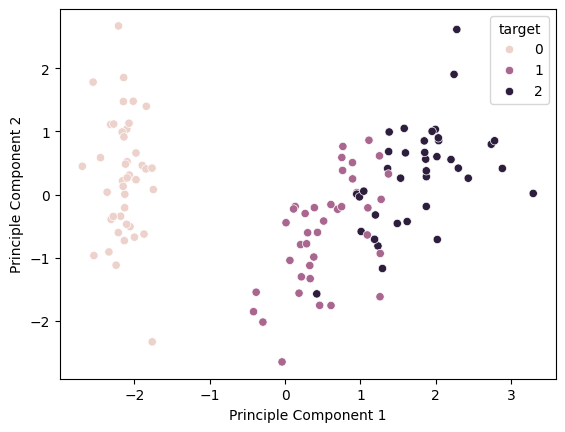

In [ ]:
pca_df = pd.DataFrame(data= pca_train, columns = ['Principle Component 1', 'Principle Component 2'])
#pca_df = pd.DataFrame(data= pca_train, columns = ['pc 1', 'pc 2', 'pc3'])
pca_df.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
y_train = pd.DataFrame(y_train)
final_pca_df = pca_df
final_pca_df['target'] = y_train.reset_index(drop=True)

ax = sns.scatterplot(x = final_pca_df.iloc[:,0], y = final_pca_df.iloc[:,1], hue = 'target', data = final_pca_df, legend= True)
plt.show()

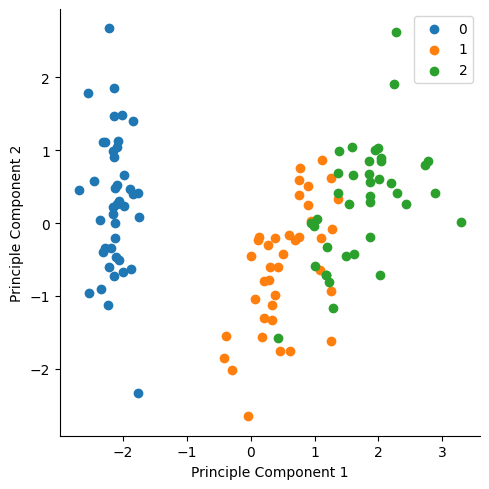

In [ ]:
sns.FacetGrid(final_pca_df, hue='target', height = 5).map(plt.scatter,'Principle Component 1', 'Principle Component 2')
plt.legend(loc = 'upper right')

In [ ]:
column = 'target'
num_unique_values = final_pca_df[column].nunique()
value_counts = final_pca_df[column].value_counts()
print(f'The number of unique values in the column "{column}" is {num_unique_values}')
print('\n')
print(value_counts)
print('\n')

The number of unique values in the column "target" is 3


target
0    42
2    39
1    39
Name: count, dtype: int64




In [ ]:
final_pca_df

Principle Component 1  Principle Component 2  target
0                -2.101167               1.036578       0
1                 1.846651               0.849354       2
2                -1.896135               0.461113       0
3                 0.752428               0.586262       1
4                -0.294967              -2.021019       1
..                     ...                    ...     ...
115              -1.749332               0.078375       0
116              -2.211974               2.670885       0
117               2.430245               0.258087       2
118               0.215399              -1.303994       1
119               1.619593              -0.428236       2

[120 rows x 3 columns]

### LDA

In [7]:
lda_model = LinearDiscriminantAnalysis(n_components=2)  # , random_state = random_state
X_train_lda = lda_model.fit_transform(X_train_scaled, y_train)
X_test_lda = lda_model.transform(X_test_scaled)

In [ ]:
import numpy as np
import pandas as pd

# Check for NaN values in transformed data
print("NaN in X_train_lda:", np.isnan(X_train_lda).sum())
print("NaN in X_test_lda:", np.isnan(X_test_lda).sum())
print('\n')

# Check shapes of transformed data and target variable
print("Shape of X_train_lda:", X_train_lda.shape)
print("Shape of y_train:", y_train.shape)
print('\n')

# Check for NaN values in the original scaled data
print("NaN in X_train_scaled:", np.isnan(X_train_scaled).sum())
print('\n')

# Check for NaN values in y_train
print("NaN in y_train:", np.isnan(y_train).sum())

NaN in X_train_lda: 0
NaN in X_test_lda: 0


Shape of X_train_lda: (120, 2)
Shape of y_train: (120,)


NaN in X_train_scaled: 0


NaN in y_train: 0


In [55]:
cov_mat_after_FE_2 = np.cov(X_train_lda.T)
print(f'Cvariance Matrix of features is : \n\n {cov_mat_after_FE_2}\n\n')

epsilon = 1e-3

# Replace elements smaller than epsilon with zeros
new_cov_matrix_2 = np.where(cov_mat_after_FE_2 < epsilon, 0, cov_mat_after_FE_2)
rounded_matrix_3 = np.round(cov_mat_after_FE_2, 3)
# Print the modified matrix
print(new_cov_matrix_2)
print('\n')
print(f'Covariance Matrix after feature Extraction is :\n{rounded_matrix_3}\n')

Cvariance Matrix of features is : 

 [[ 3.21769569e+01 -3.71979845e-15]
 [-3.71979845e-15  1.30115433e+00]]


[[32.17695692  0.        ]
 [ 0.          1.30115433]]


Covariance Matrix after feature Extraction is :
[[32.177 -0.   ]
 [-0.     1.301]]



In [8]:
# Create the DataFrame with LDA components
lda_df = pd.DataFrame(X_train_lda, columns=['LDA Component 1', 'LDA Component 2'])
lda_df['target'] = y_train.reset_index(drop=True) # Ensure y_train is correctly aligned and has no NaN values



# Display the DataFrame to check for any issues
print(lda_df.head())
print('\n')
print(lda_df.info())
print('\n')
print(lda_df.isna().sum())


# Check for dtype issues
print(lda_df.dtypes)
print(y_train.dtypes)
print('\n')

   LDA Component 1  LDA Component 2  target
0         8.034107        -0.704388       0
1        -7.924256        -2.070062       2
2         6.078344        -1.171501       0
3        -1.885157        -0.479027       1
4        -0.314971         1.919442       1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LDA Component 1  120 non-null    float64
 1   LDA Component 2  120 non-null    float64
 2   target           120 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 KB
None


LDA Component 1    0
LDA Component 2    0
target             0
dtype: int64
LDA Component 1    float64
LDA Component 2    float64
target               int64
dtype: object
int64




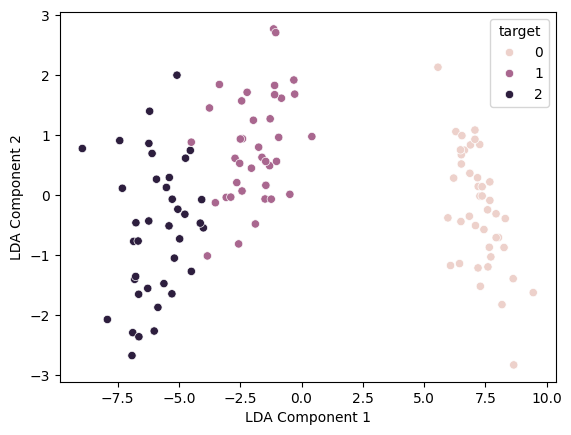

In [ ]:
ax = sns.scatterplot(x = lda_df.iloc[:,0], y = lda_df.iloc[:,1], hue = 'target', data = lda_df, legend= True)
plt.show()

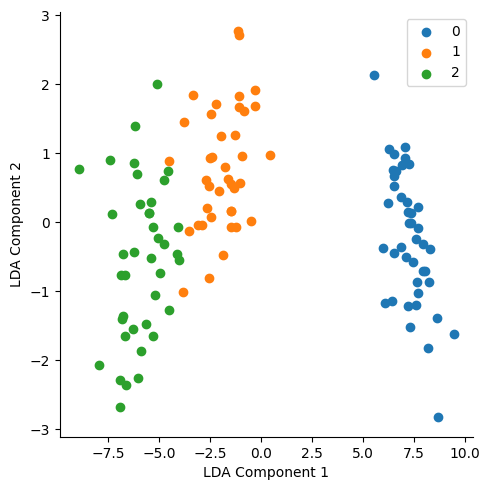

In [ ]:
'''
lda_df = pd.DataFrame(X_train_lda, columns=['LDA Component 1', 'LDA Component 2'])
lda_df['target'] =y_train
'''
sns.FacetGrid(lda_df, hue='target', height = 5).map(plt.scatter,'LDA Component 1', 'LDA Component 2')
plt.legend(loc = 'upper right')

In [ ]:
column = 'target'
num_unique_values = lda_df[column].nunique()
value_counts = lda_df[column].value_counts()
print(f'The number of unique values in the column "{column}" is {num_unique_values}')
print('\n')
print(value_counts)
print('\n')
#y_train.shape
#print(y_train)

The number of unique values in the column "target" is 3


target
0    42
2    39
1    39
Name: count, dtype: int64




In [9]:
lda_df

LDA Component 1  LDA Component 2  target
0           8.034107        -0.704388       0
1          -7.924256        -2.070062       2
2           6.078344        -1.171501       0
3          -1.885157        -0.479027       1
4          -0.314971         1.919442       1
..               ...              ...     ...
115         5.971354        -0.377230       0
116         8.657777        -2.827542       0
117        -6.099672         0.695631       2
118        -1.098984         1.675059       1
119        -5.396186         0.295473       2

[120 rows x 3 columns]

# Part2: Linear SVM Classifier

## Without Feature Extraction

In [ ]:
X_svc_trn = X_train_scaled
X_svc_tst = X_test_scaled
y_svc_trn = y_train
y_svc_tst = y_test

# Assuming X_svc_trn is a numpy array, if it's a DataFrame, convert it to numpy array
X_svc_trn = X_svc_trn.to_numpy() if isinstance(X_svc_trn, pd.DataFrame) else X_svc_trn
X_svc_tst = X_svc_tst.to_numpy() if isinstance(X_svc_tst, pd.DataFrame) else X_svc_tst
y_svc_trn = y_svc_trn.to_numpy() if isinstance(y_svc_trn, pd.DataFrame) else y_svc_trn

In [ ]:
clf_without_DR = SVC(kernel = 'linear', C = 0.5, random_state=random_state)
clf_without_DR.fit(X_svc_trn, y_svc_trn)

SVC(C=0.5, kernel='linear', random_state=54)

In [ ]:
print(f'Support Vectors are :\n {clf_without_DR.support_vectors_}')
print(f'\nSupport Vectors of each classes are : \n{clf_without_DR.n_support_}\n')

print('weights : \n', clf_without_DR.coef_, '\n\nbias : \n', clf_without_DR.intercept_)

Support Vectors are :
 [[-1.56834936 -1.76353227 -1.35247624 -1.14648579]
 [-0.85725897  0.53923022 -1.12838629 -0.88836516]
 [ 0.68343687  0.30895397  0.44024339  0.40223798]
 [ 0.20937661 -0.38187478  0.44024339  0.40223798]
 [ 0.09086155  0.30895397  0.60831085  0.78941892]
 [-0.85725897 -1.30297977 -0.40009394 -0.11400328]
 [ 0.32789168 -0.38187478  0.55228836  0.27317767]
 [-0.50171377 -0.15159853  0.44024339  0.40223798]
 [ 0.44640674 -1.99380852  0.44024339  0.40223798]
 [ 1.03898207 -0.15159853  0.72035583  0.66035861]
 [-0.26468364 -0.15159853  0.44024339  0.40223798]
 [ 1.15749713 -0.61215103  0.60831085  0.27317767]
 [ 0.56492181 -1.30297977  0.66433334  0.40223798]
 [ 0.20937661 -0.84242728  0.77637832  0.53129829]
 [-1.0942891  -1.53325602 -0.23202647 -0.24306359]
 [ 0.80195194 -0.61215103  0.49626588  0.40223798]
 [ 1.2760122   0.07867772  0.66433334  0.40223798]
 [ 0.56492181  0.53923022  0.55228836  0.53129829]
 [-0.26468364 -0.61215103  0.66433334  1.04753955]
 [ 1.631

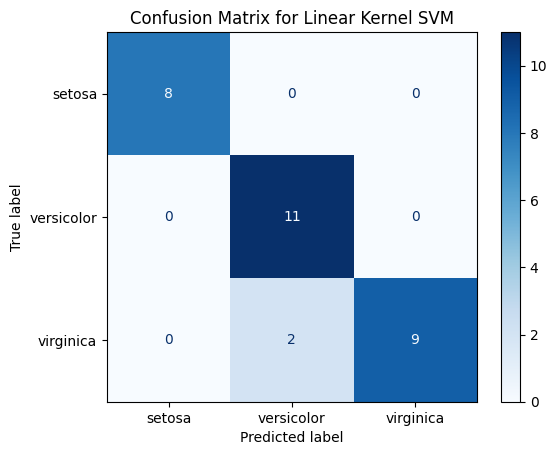

		SVM performance score without Dimension Reduction
		Accuracy : 0.93 %

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.85      1.00      0.92        11
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



In [ ]:
y_pred_without_DR = clf_without_DR.predict(X_svc_tst)
cm = confusion_matrix(y_svc_tst, y_pred_without_DR)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Linear Kernel SVM")
plt.show()

SVM_score_without_DR = clf_without_DR.score(X_svc_tst, y_svc_tst) # SVM performance score without Dimension Reduction
print(f'\t\tSVM performance score without Dimension Reduction\n\t\tAccuracy : {SVM_score_without_DR :.2f} %')

print("\nClassification Report: \n")
print(f'{classification_report(y_svc_tst,y_pred_without_DR)}')


## With Feature Extraction

In [ ]:
# Visualization_1
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [ ]:
# Visualization_2
def plot_decision_boundary(svm_model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5, 5))
    plt.contourf(xx, yy, Z, alpha=0.1)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    #plt.grid()
    plt.show()

### SVM PCA

In [ ]:
X_trn_sc_pca = final_pca_df.drop('target', axis=1).values
y_trn_sc_pca = final_pca_df['target'].values

X_svc_trn = X_trn_sc_pca
X_svc_tst = pca_test
y_svc_trn = y_trn_sc_pca
y_svc_tst = y_test

In [ ]:
clf_pca = SVC(kernel = 'linear', C=0.5, random_state=random_state)
clf_pca.fit(X_svc_trn, y_svc_trn)

SVC(C=0.5, kernel='linear', random_state=54)

Support Vectors are :
 [[-1.76405667 -2.33424053]
 [-1.87318602 -0.6270649 ]
 [-1.74933239  0.078375  ]
 [ 0.75242766  0.58626202]
 [ 1.11231521  0.85984204]
 [ 0.69613582 -0.23356639]
 [ 0.762724    0.3813512 ]
 [ 0.45839617 -1.75585975]
 [-0.38450396 -1.54775797]
 [ 0.95049629  0.03080363]
 [ 0.74973847 -0.1925272 ]
 [ 0.89358355  0.50531126]
 [ 1.25903396 -1.61940683]
 [ 1.37094956  0.32541703]
 [ 1.27407361 -0.07698829]
 [ 1.26205186 -0.93411487]
 [ 1.0906082  -0.64065185]
 [ 0.89523859  0.24753785]
 [-0.41913597 -1.85626151]
 [ 1.09795699 -0.21104381]
 [ 0.60888461 -1.75847315]
 [ 1.25212159  0.61252563]
 [ 0.76640998  0.76147612]
 [ 1.29164837 -1.17210191]
 [ 1.00903106 -0.58606132]
 [ 1.19814304 -0.32418532]
 [ 1.18680272 -0.70977922]
 [ 0.4197628  -1.57429123]
 [ 1.59664428  0.659942  ]
 [ 1.38093052  0.99070319]
 [ 0.94980503  0.00532885]
 [ 1.23209281 -0.81509987]
 [ 1.37394428  0.68006718]
 [ 0.9864208  -0.03743828]
 [ 1.36029067  0.41135583]
 [ 1.18680272 -0.70977922]
 [ 1.

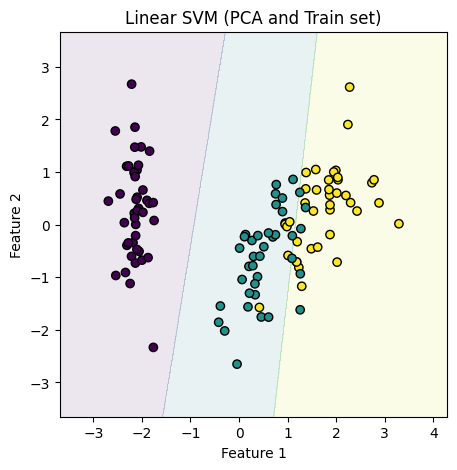

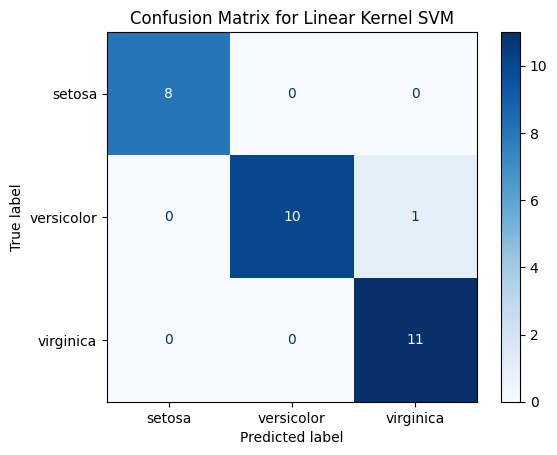

		SVM performance score Test set
		Accuracy : 0.97 %

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



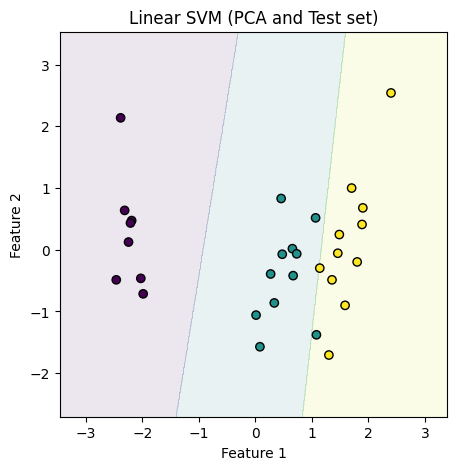

In [ ]:
clf = clf_pca

print(f'Support Vectors are :\n {clf.support_vectors_}')
print(f'\nSupport Vectors of each classes are : \n{clf.n_support_}\n')
print('weights : \n', clf.coef_, '\n\nbias : \n', clf.intercept_)

# Train part
SVM_score_pca = clf.score(X_svc_trn, y_svc_trn) # SVM performance score without Dimension Reduction
print(f'\n\t\tSVM performance score Train set\n\t\tAccuracy : {SVM_score_pca :.2f} %')
plot_decision_boundary(clf, X_svc_trn, y_svc_trn, 'Linear SVM (PCA and Train set)')

# Test part
y_pred_pca = clf.predict(X_svc_tst)
cm = confusion_matrix(y_svc_tst, y_pred_pca)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Linear Kernel SVM")
plt.show()

SVM_score_pca = clf.score(X_svc_tst, y_svc_tst) # SVM performance score without Dimension Reduction
print(f'\t\tSVM performance score Test set\n\t\tAccuracy : {SVM_score_pca :.2f} %')

print("\nClassification Report: \n")
print(f'{classification_report(y_svc_tst,y_pred_pca)}')

plot_decision_boundary(clf, X_svc_tst, y_svc_tst, 'Linear SVM (PCA and Test set)')



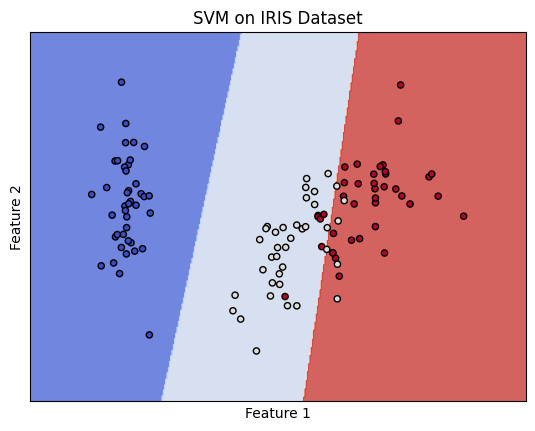

In [ ]:
# Visualization_1
clf = clf_pca
# Create a new figure and axis
fig, ax = plt.subplots()

# Assuming X_svc_trn is a numpy array, if it's a DataFrame, convert it to numpy array
X_svc_trn_array = X_svc_trn.to_numpy() if isinstance(X_svc_trn, pd.DataFrame) else X_svc_trn

# Extract the first and second columns from X_svc_trn_array
X0, X1 = X_svc_trn_array[:, 0], X_svc_trn_array[:, 1]

# Create meshgrid
xx, yy = make_meshgrid(X0, X1)

#clf = SVC(kernel='linear', C=0.5, random_state=random_state)

# Plot contours
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

# Scatter plot of training points
ax.scatter(X0, X1, c=y_svc_trn, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('SVM on IRIS Dataset')

# Show the plot
plt.show()

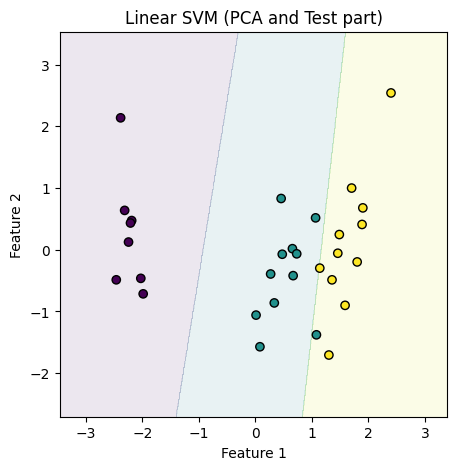

In [ ]:
# Visualization_2
clf = clf_pca
plot_decision_boundary(clf, X_svc_tst, y_svc_tst, 'Linear SVM (PCA and Test set)')

### SVM LDA

In [ ]:
X_trn_sc_lda = lda_df.drop('target', axis=1).values
y_trn_sc_lda = lda_df['target'].values

X_svc_trn = X_trn_sc_lda
X_svc_tst = X_test_lda
y_svc_trn = y_trn_sc_lda
y_svc_tst = y_test

In [ ]:
clf_lda = SVC(kernel = 'linear', C=0.5, random_state=random_state)
clf_lda.fit(X_svc_trn, y_svc_trn)

SVC(C=0.1, kernel='linear', random_state=54)

Support Vectors are :
 [[ 6.07834383 -1.17150084]
 [ 5.56609752  2.13258397]
 [-3.84319424 -1.01163726]
 [ 0.42012275  0.97721712]
 [-3.07506194 -0.03619215]
 [-3.35230184  1.84503439]
 [-3.51717329 -0.12507476]
 [-2.88829619 -0.03161346]
 [-3.75748154  1.45379646]
 [-4.49926427  0.88374534]
 [-2.56821233 -0.81163508]
 [-4.53923947  0.74648871]
 [-4.07519707 -0.07331334]
 [-4.73490914  0.61670604]
 [-4.00588709 -0.54361997]
 [-5.08452094  2.00020437]
 [-4.49764763 -1.26907762]
 [-4.76127708 -0.31711085]
 [-4.13317326 -0.46506447]]

Support Vectors of each classes are : 
[2 9 8]

weights : 
 [[0.37549003 0.05799071]
 [0.20030909 0.03082033]
 [0.8330866  0.14712106]] 

bias : 
 [-1.21417573 -0.18109493  3.20570469]

		SVM performance score Train set
		Accuracy : 0.98 %


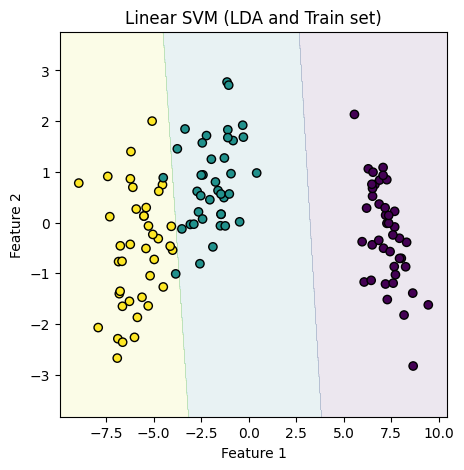

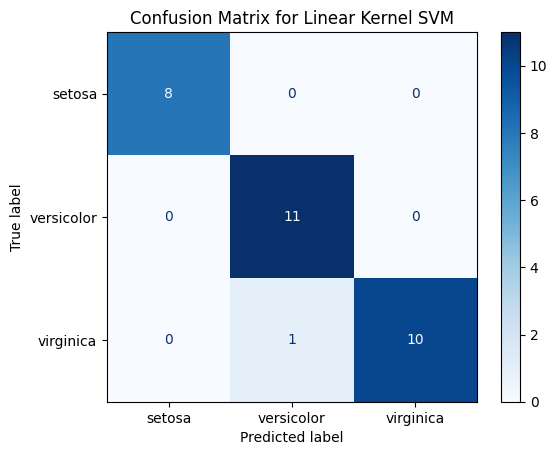

		SVM performance score Test set
		Accuracy : 0.97 %

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.92      1.00      0.96        11
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



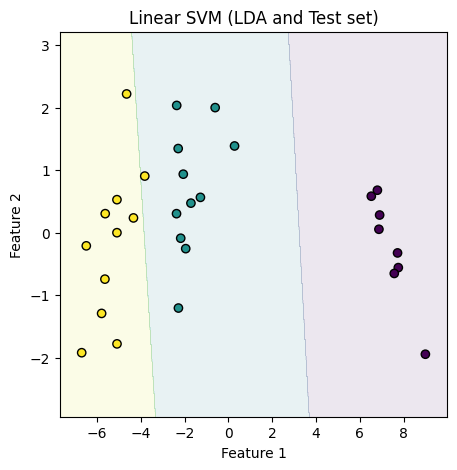

In [ ]:
clf = clf_lda

print(f'Support Vectors are :\n {clf.support_vectors_}')
print(f'\nSupport Vectors of each classes are : \n{clf.n_support_}\n')
print('weights : \n', clf.coef_, '\n\nbias : \n', clf.intercept_)

# Train part
SVM_score_lda = clf.score(X_svc_trn, y_svc_trn) # SVM performance score without Dimension Reduction
print(f'\n\t\tSVM performance score Train set\n\t\tAccuracy : {SVM_score_lda :.2f} %')
plot_decision_boundary(clf, X_svc_trn, y_svc_trn, 'Linear SVM (LDA and Train set)')

# Test part
y_pred_lda = clf.predict(X_svc_tst)
cm = confusion_matrix(y_svc_tst, y_pred_lda)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Linear Kernel SVM")
plt.show()

SVM_score_lda = clf.score(X_svc_tst, y_svc_tst) # SVM performance score without Dimension Reduction
print(f'\t\tSVM performance score Test set\n\t\tAccuracy : {SVM_score_lda :.2f} %')

print("\nClassification Report: \n")
print(f'{classification_report(y_svc_tst,y_pred_lda)}')

plot_decision_boundary(clf, X_svc_tst, y_svc_tst, 'Linear SVM (LDA and Test set)')

# Part3: SVM Classifier with Polynomail Kernal

## A_poly_deg3_LDA

In [ ]:
X_trn_sc_lda = lda_df.drop('target', axis=1).values
y_trn_sc_lda = lda_df['target'].values

X_svc_trn = X_trn_sc_lda
X_svc_tst = X_test_lda
y_svc_trn = y_trn_sc_lda
y_svc_tst = y_test

In [ ]:
degree = 3

In [ ]:
clf_lda = SVC(kernel = 'poly', C=0.5, degree=degree, random_state=random_state)
clf_lda.fit(X_svc_trn, y_svc_trn)

SVC(C=0.5, kernel='poly', random_state=54)

Support Vectors are :
 [[ 6.07834383 -1.17150084]
 [ 5.56609752  2.13258397]
 [ 5.97135371 -0.37722993]
 [-2.64280256  0.21040791]
 [-3.84319424 -1.01163726]
 [ 0.42012275  0.97721712]
 [-2.714386    0.61521703]
 [-3.07506194 -0.03619215]
 [-3.35230184  1.84503439]
 [-3.51717329 -0.12507476]
 [-2.88829619 -0.03161346]
 [-2.40941278  0.9403726 ]
 [-3.75748154  1.45379646]
 [-2.49824552  0.93637876]
 [-4.49926427  0.88374534]
 [-0.28031622  1.68428833]
 [-2.52459509  0.53098477]
 [-2.42895712  0.07034873]
 [-2.56821233 -0.81163508]
 [-0.47756919  0.01483001]
 [-4.53923947  0.74648871]
 [-5.29075773 -1.64275051]
 [-4.07519707 -0.07331334]
 [-5.19053287 -1.04824525]
 [-4.73490914  0.61670604]
 [-4.00588709 -0.54361997]
 [-5.27724534 -0.06668184]
 [-5.08452094  2.00020437]
 [-4.49764763 -1.26907762]
 [-4.76127708 -0.31711085]
 [-5.04900101 -0.23346344]
 [-4.9743924  -0.72708352]
 [-4.13317326 -0.46506447]
 [-5.39618613  0.29547266]]

Support Vectors of each classes are : 
[ 3 17 14]


		SVM

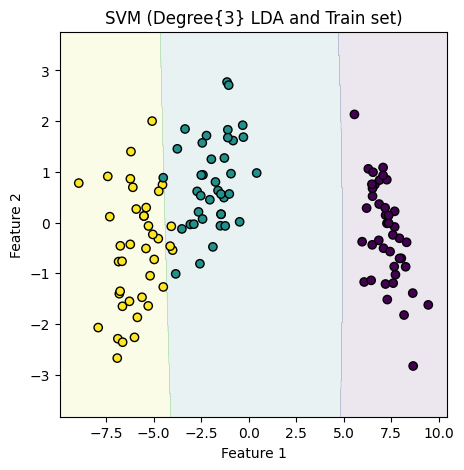

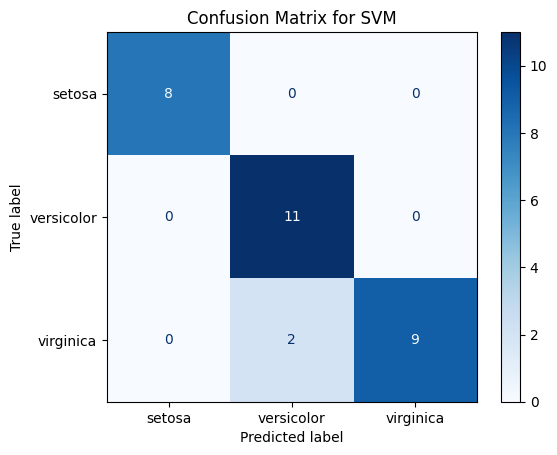

		SVM performance score Test set
		Accuracy : 0.93 %

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.85      1.00      0.92        11
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



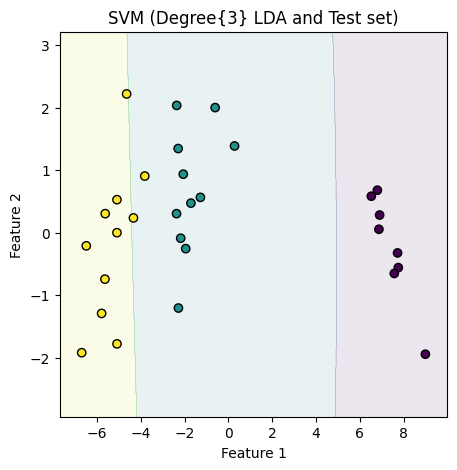

In [ ]:
clf = clf_lda

print(f'Support Vectors are :\n {clf.support_vectors_}')
print(f'\nSupport Vectors of each classes are : \n{clf.n_support_}\n')
#print('weights : \n', clf.coef_, '\n\nbias : \n', clf.intercept_)

# Train part
SVM_score_lda = clf.score(X_svc_trn, y_svc_trn) # SVM performance score without Dimension Reduction
print(f'\n\t\tSVM performance score Train set\n\t\tAccuracy : {SVM_score_lda :.2f} %')
plot_decision_boundary(clf, X_svc_trn, y_svc_trn, 'SVM (Degree{3} LDA and Train set)')

# Test part
y_pred_lda = clf.predict(X_svc_tst)
cm = confusion_matrix(y_svc_tst, y_pred_lda)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for SVM")
plt.show()

SVM_score_lda = clf.score(X_svc_tst, y_svc_tst) # SVM performance score without Dimension Reduction
print(f'\t\tSVM performance score Test set\n\t\tAccuracy : {SVM_score_lda :.2f} %')

print("\nClassification Report: \n")
print(f'{classification_report(y_svc_tst,y_pred_lda)}')

plot_decision_boundary(clf, X_svc_tst, y_svc_tst, 'SVM (Degree{3} LDA and Test set)')

## B_poly_deg3_PCA

In [ ]:
X_trn_sc_pca = final_pca_df.drop('target', axis=1).values
y_trn_sc_pca = final_pca_df['target'].values

X_svc_trn = X_trn_sc_pca
X_svc_tst = pca_test
y_svc_trn = y_trn_sc_pca
y_svc_tst = y_test

In [ ]:
clf_pca = SVC(kernel = 'poly', C=0.5, degree=degree, random_state=random_state)
clf_pca.fit(X_svc_trn, y_svc_trn)

SVC(C=0.5, kernel='poly', random_state=54)

Support Vectors are :
 [[-1.89613484  0.46111332]
 [-1.84718195  0.40527578]
 [-1.7666248   0.41870773]
 [-1.76405667 -2.33424053]
 [-1.87318602 -0.6270649 ]
 [-1.74933239  0.078375  ]
 [ 0.75242766  0.58626202]
 [ 1.11231521  0.85984204]
 [ 0.69613582 -0.23356639]
 [ 0.762724    0.3813512 ]
 [-0.38450396 -1.54775797]
 [ 0.95049629  0.03080363]
 [ 0.74973847 -0.1925272 ]
 [ 0.13287162 -0.18945562]
 [ 0.26568192 -0.30135012]
 [ 0.89358355  0.50531126]
 [ 1.25903396 -1.61940683]
 [ 0.60759562 -0.15897006]
 [ 0.11189322 -0.22924781]
 [ 1.37094956  0.32541703]
 [ 0.38819588 -0.20833379]
 [ 1.27407361 -0.07698829]
 [ 1.26205186 -0.93411487]
 [ 0.42947125 -0.60028211]
 [ 1.0906082  -0.64065185]
 [ 0.51137792 -0.4204845 ]
 [ 0.89523859  0.24753785]
 [-0.41913597 -1.85626151]
 [ 1.09795699 -0.21104381]
 [ 0.60888461 -1.75847315]
 [ 1.25212159  0.61252563]
 [ 0.76640998  0.76147612]
 [ 0.01168399 -0.44674811]
 [ 1.29164837 -1.17210191]
 [ 1.00903106 -0.58606132]
 [ 1.19814304 -0.32418532]
 [ 1.

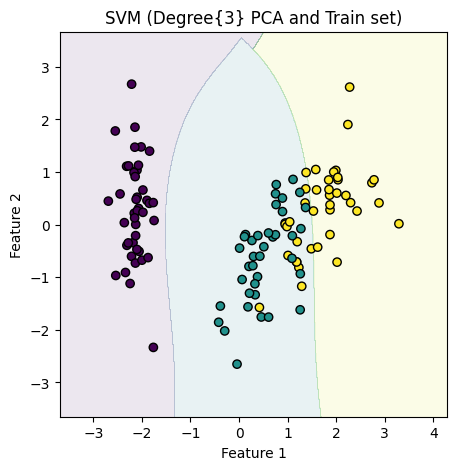

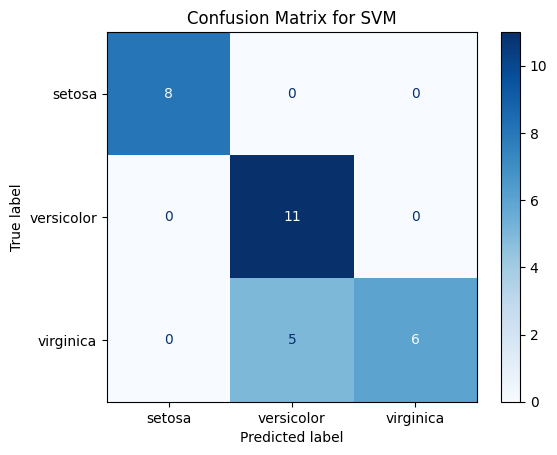

		SVM performance score Test set
		Accuracy : 0.83 %

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.69      1.00      0.81        11
           2       1.00      0.55      0.71        11

    accuracy                           0.83        30
   macro avg       0.90      0.85      0.84        30
weighted avg       0.89      0.83      0.82        30



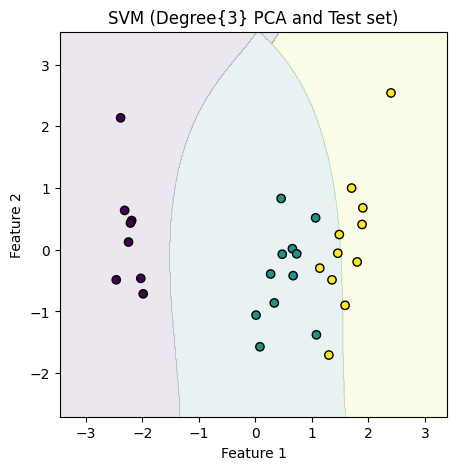

In [ ]:
clf = clf_pca

print(f'Support Vectors are :\n {clf.support_vectors_}')
print(f'\nSupport Vectors of each classes are : \n{clf.n_support_}\n')
#print('weights : \n', clf.coef_, '\n\nbias : \n', clf.intercept_)

# Train part
SVM_score_pca = clf.score(X_svc_trn, y_svc_trn) # SVM performance score without Dimension Reduction
print(f'\n\t\tSVM performance score Train set\n\t\tAccuracy : {SVM_score_pca :.2f} %')
plot_decision_boundary(clf, X_svc_trn, y_svc_trn, 'SVM (Degree{3} PCA and Train set)')

# Test part
y_pred_pca = clf.predict(X_svc_tst)
cm = confusion_matrix(y_svc_tst, y_pred_pca)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for SVM")
plt.show()

SVM_score_pca = clf.score(X_svc_tst, y_svc_tst) # SVM performance score without Dimension Reduction
print(f'\t\tSVM performance score Test set\n\t\tAccuracy : {SVM_score_pca :.2f} %')

print("\nClassification Report: \n")
print(f'{classification_report(y_svc_tst,y_pred_pca)}')

plot_decision_boundary(clf, X_svc_tst, y_svc_tst, 'SVM (Degree{3} PCA and Test set)')

## C_poly_task

In [32]:
def plot_decision_boundary(clf, X, y, title , save_path):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5, 5))
    plt.contourf(xx, yy, Z, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.savefig(save_path)
    plt.show()

In [33]:
X_trn_sc_lda = lda_df.drop('target', axis=1).values
y_trn_sc_lda = lda_df['target'].values

X_svc_trn = X_trn_sc_lda
X_svc_tst = X_test_lda
y_svc_trn = y_trn_sc_lda
y_svc_tst = y_test


		SVM performance score Train set
		Accuracy : 0.98 %


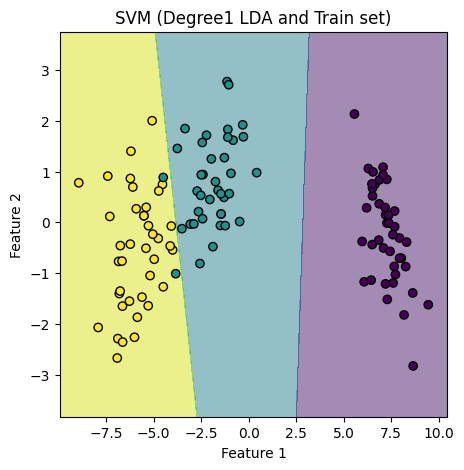

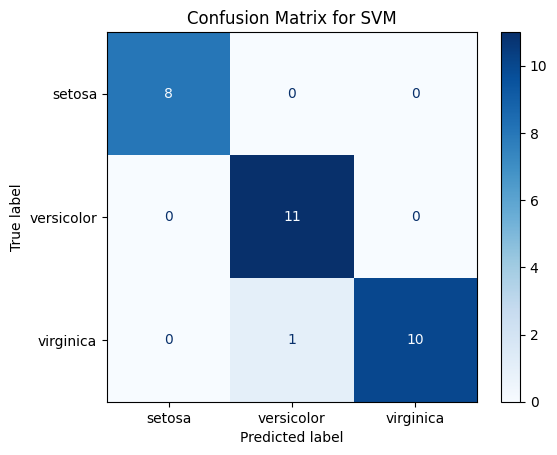

		SVM performance score Test set
		Accuracy : 0.97 %

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.92      1.00      0.96        11
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



<Figure size 640x480 with 0 Axes>

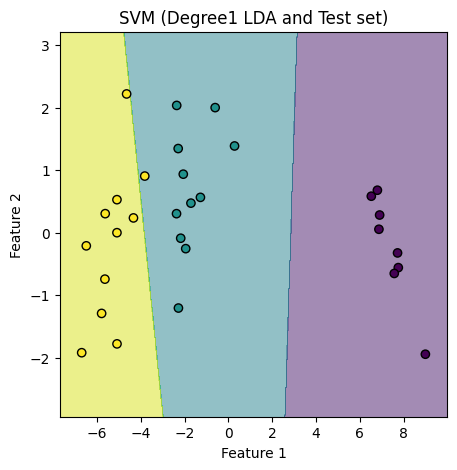


		SVM performance score Train set
		Accuracy : 0.82 %


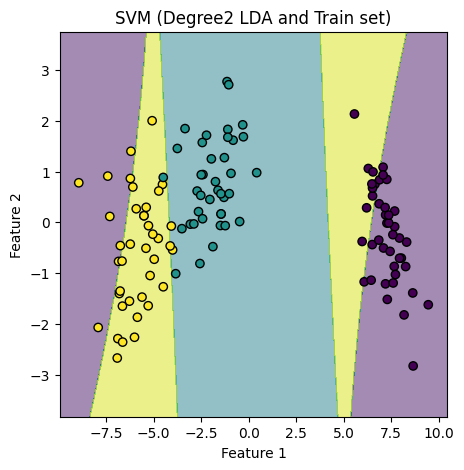

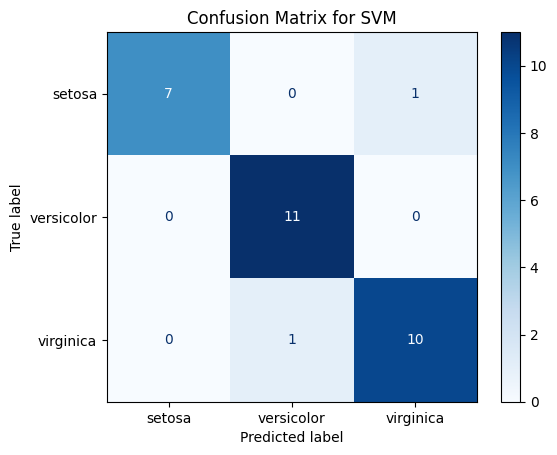

		SVM performance score Test set
		Accuracy : 0.93 %

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.92      1.00      0.96        11
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



<Figure size 640x480 with 0 Axes>

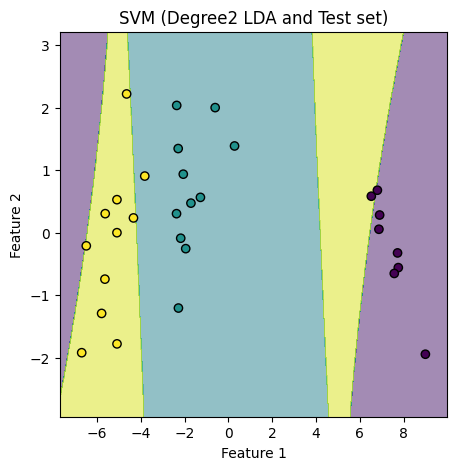


		SVM performance score Train set
		Accuracy : 0.97 %


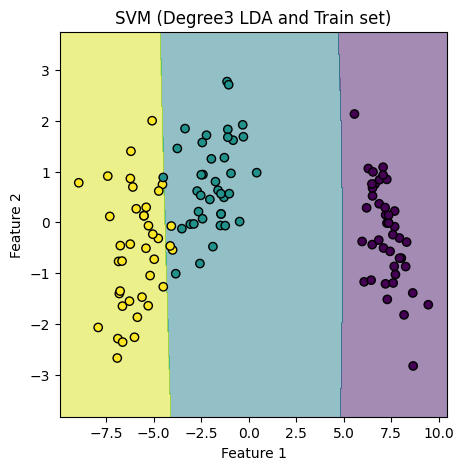

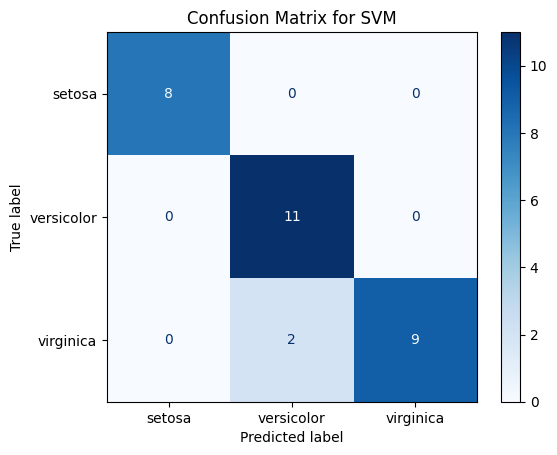

		SVM performance score Test set
		Accuracy : 0.93 %

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.85      1.00      0.92        11
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



<Figure size 640x480 with 0 Axes>

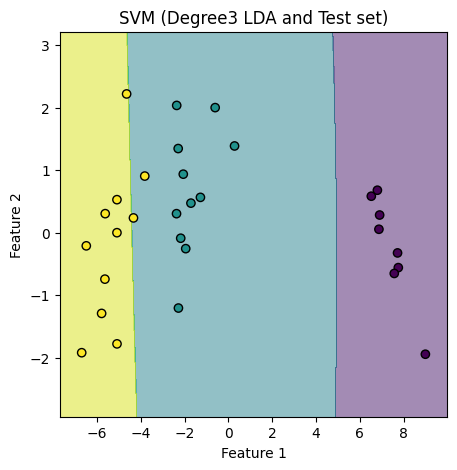


		SVM performance score Train set
		Accuracy : 0.82 %


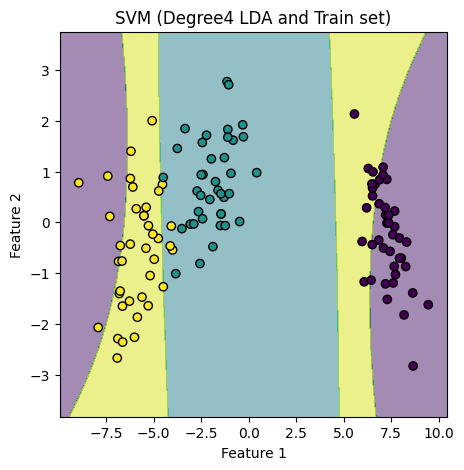

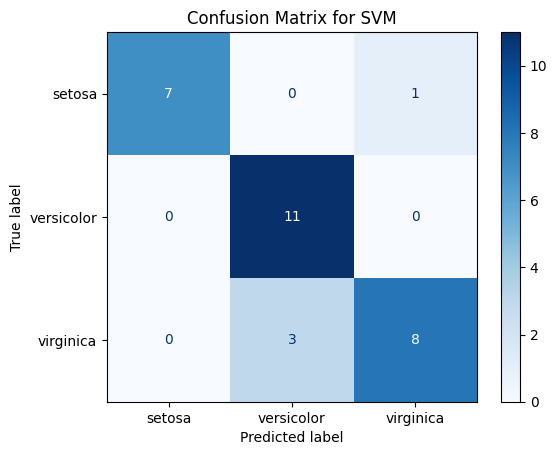

		SVM performance score Test set
		Accuracy : 0.87 %

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.79      1.00      0.88        11
           2       0.89      0.73      0.80        11

    accuracy                           0.87        30
   macro avg       0.89      0.87      0.87        30
weighted avg       0.88      0.87      0.86        30



<Figure size 640x480 with 0 Axes>

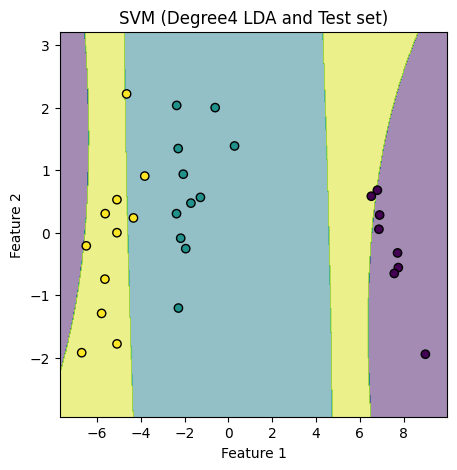


		SVM performance score Train set
		Accuracy : 0.95 %


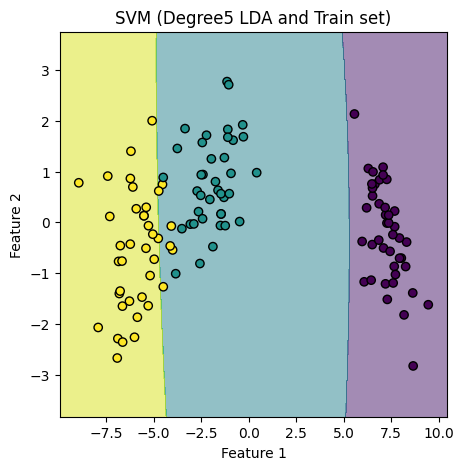

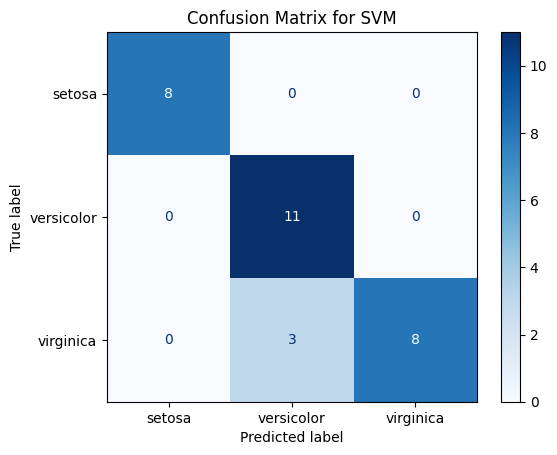

		SVM performance score Test set
		Accuracy : 0.90 %

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.79      1.00      0.88        11
           2       1.00      0.73      0.84        11

    accuracy                           0.90        30
   macro avg       0.93      0.91      0.91        30
weighted avg       0.92      0.90      0.90        30



<Figure size 640x480 with 0 Axes>

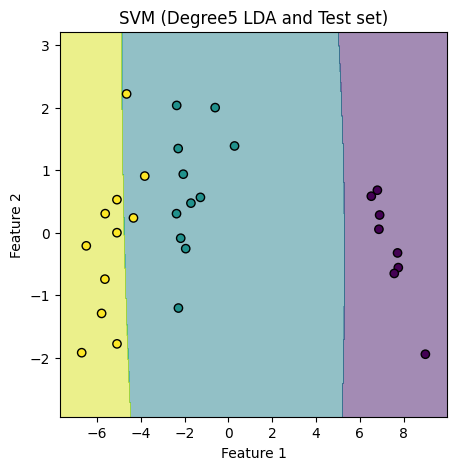


		SVM performance score Train set
		Accuracy : 0.80 %


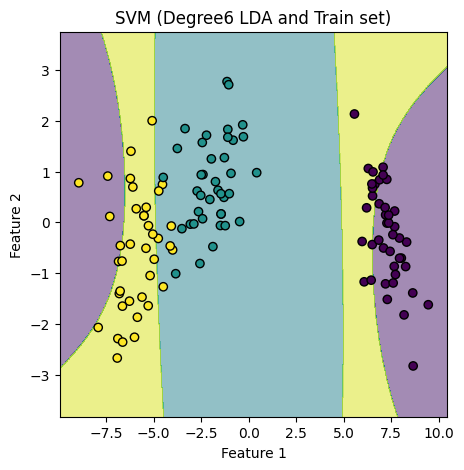

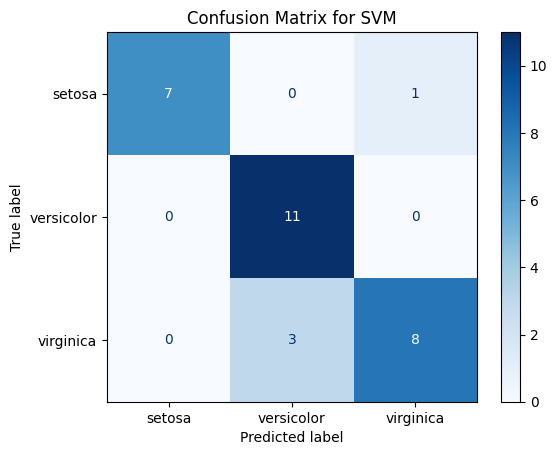

		SVM performance score Test set
		Accuracy : 0.87 %

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.79      1.00      0.88        11
           2       0.89      0.73      0.80        11

    accuracy                           0.87        30
   macro avg       0.89      0.87      0.87        30
weighted avg       0.88      0.87      0.86        30



<Figure size 640x480 with 0 Axes>

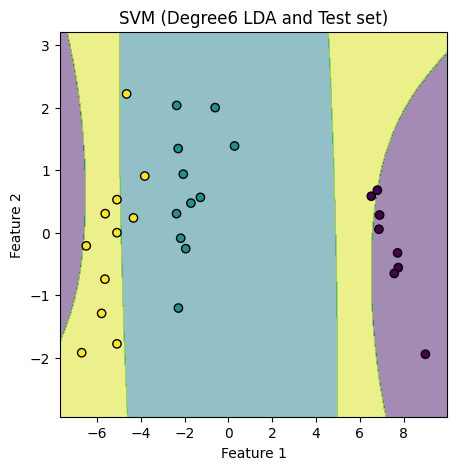


		SVM performance score Train set
		Accuracy : 0.94 %


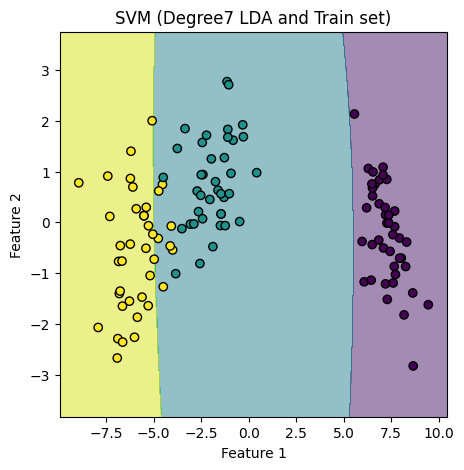

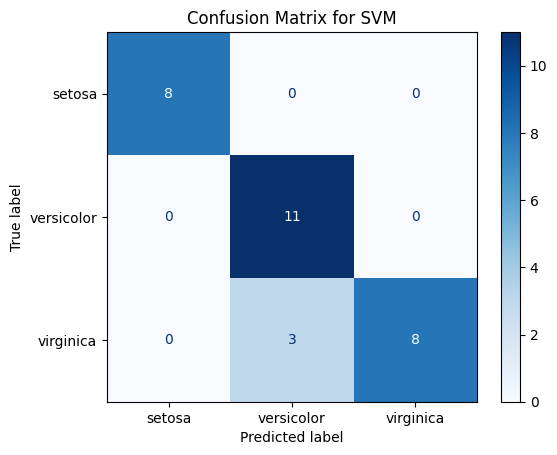

		SVM performance score Test set
		Accuracy : 0.90 %

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.79      1.00      0.88        11
           2       1.00      0.73      0.84        11

    accuracy                           0.90        30
   macro avg       0.93      0.91      0.91        30
weighted avg       0.92      0.90      0.90        30



<Figure size 640x480 with 0 Axes>

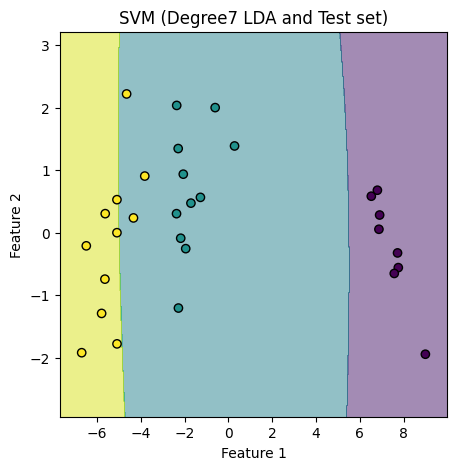


		SVM performance score Train set
		Accuracy : 0.79 %


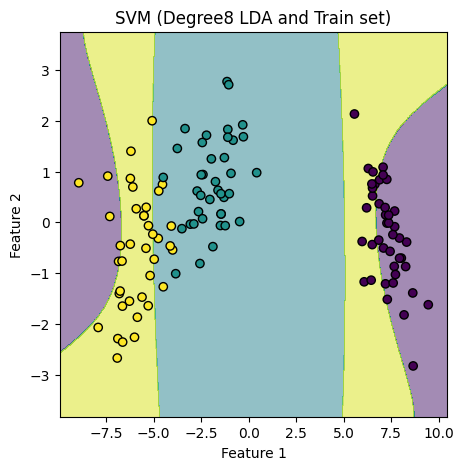

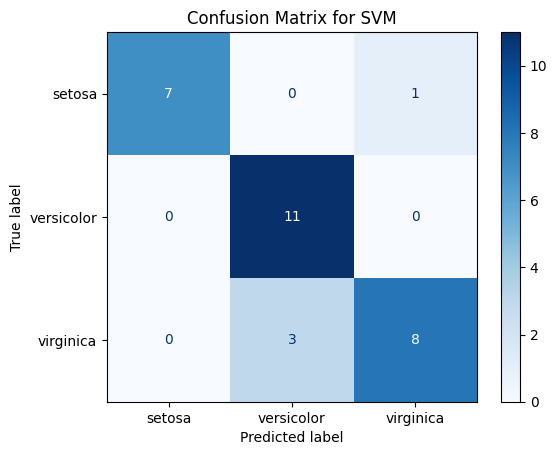

		SVM performance score Test set
		Accuracy : 0.87 %

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.79      1.00      0.88        11
           2       0.89      0.73      0.80        11

    accuracy                           0.87        30
   macro avg       0.89      0.87      0.87        30
weighted avg       0.88      0.87      0.86        30



<Figure size 640x480 with 0 Axes>

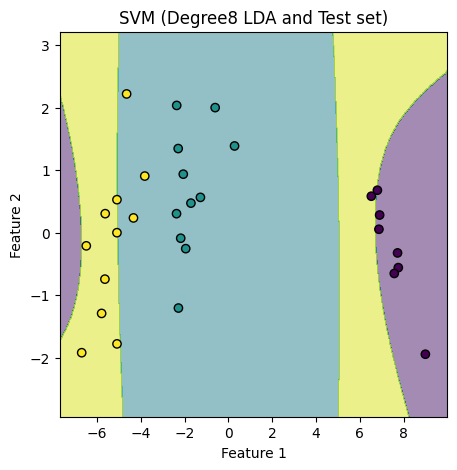


		SVM performance score Train set
		Accuracy : 0.92 %


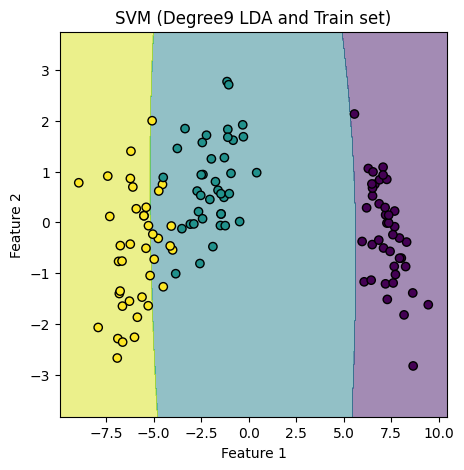

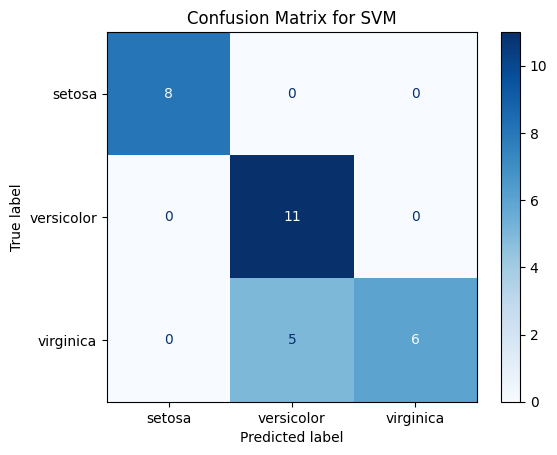

		SVM performance score Test set
		Accuracy : 0.83 %

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.69      1.00      0.81        11
           2       1.00      0.55      0.71        11

    accuracy                           0.83        30
   macro avg       0.90      0.85      0.84        30
weighted avg       0.89      0.83      0.82        30



<Figure size 640x480 with 0 Axes>

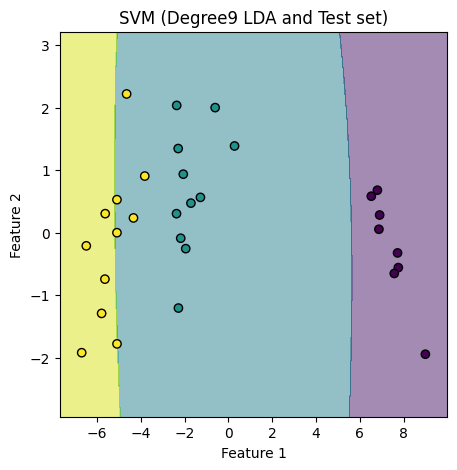


		SVM performance score Train set
		Accuracy : 0.75 %


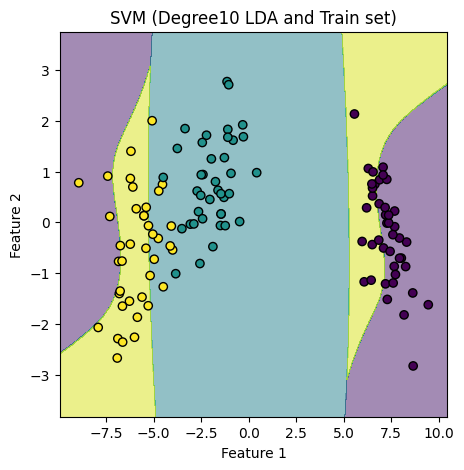

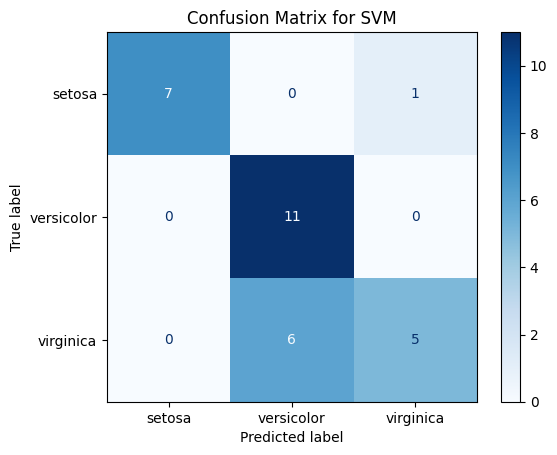

		SVM performance score Test set
		Accuracy : 0.77 %

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.65      1.00      0.79        11
           2       0.83      0.45      0.59        11

    accuracy                           0.77        30
   macro avg       0.83      0.78      0.77        30
weighted avg       0.81      0.77      0.75        30



<Figure size 640x480 with 0 Axes>

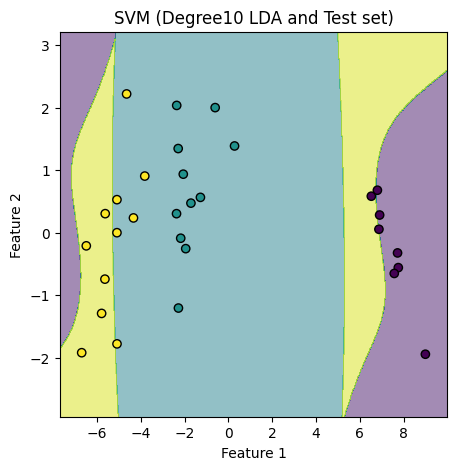

In [34]:
results = []
accuracy_Train = []
accuracy_Test = []

accuracy_Train_ = []
accuracy_Test = []

for degree in range(1, 11):
    svm_poly = SVC(kernel = 'poly', C=0.5, degree=degree, random_state=random_state)
    svm_poly.fit(X_svc_trn, y_svc_trn)

    clf = svm_poly

    # Train part
    SVM_score_lda_train = clf.score(X_svc_trn, y_svc_trn) # SVM performance score without Dimension Reduction
    print(f'\n\t\tSVM performance score Train set\n\t\tAccuracy : {SVM_score_lda_train :.2f} %')
    plot_decision_boundary(clf, X_svc_trn, y_svc_trn, f'SVM (Degree{degree} LDA and Train set)', save_path = f'svm_poly_degree_{degree}_Train.png')
    accuracy_Train.append(SVM_score_lda_train)

    # Test part
    y_pred_lda = clf.predict(X_svc_tst)
    cm = confusion_matrix(y_svc_tst, y_pred_lda)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix for SVM")
    plt.show()

    SVM_score_lda_test = clf.score(X_svc_tst, y_svc_tst) # SVM performance score without Dimension Reduction
    print(f'\t\tSVM performance score Test set\n\t\tAccuracy : {SVM_score_lda_test :.2f} %')
    accuracy_Test.append(SVM_score_lda_test)

    print("\nClassification Report: \n")
    print(f'{classification_report(y_svc_tst,y_pred_lda)}')

    plt.figure()
    plot_decision_boundary(clf, X_svc_tst, y_svc_tst, f'SVM (Degree{degree} LDA and Test set)', save_path = f'svm_poly_degree_{degree}_Test.png')

    results.append((degree, SVM_score_lda_train, SVM_score_lda_test))




In [35]:
accuracy_Train_lib = accuracy_Train.copy()
accuracy_Test_lib = accuracy_Test.copy()

In [17]:
images_Train = []
images_Test = []
# Creating a list of durations (in seconds) for each frame
#durations = [1] * 50  # 1 second delay after each frame
durations = []

for degree in range(1, 11):
    images_Train.append(imageio.imread(f'svm_poly_degree_{degree}_Train.png'))
    durations.append(1)  # 1 second delay for each image
imageio.mimsave('svm_poly_kernels_Train.gif', images_Train, duration=durations)


for degree in range(1, 11):
    images_Test.append(imageio.imread(f'svm_poly_degree_{degree}_Test.png'))
imageio.mimsave('svm_poly_kernels_Test.gif', images_Test, duration=durations)

In [18]:
from PIL import Image, ImageSequence

images_Train = []
images_Test = []

for degree in range(1, 11):
    images_Train.append(Image.open(f'svm_poly_degree_{degree}_Train.png'))

for degree in range(1, 11):
    images_Test.append(Image.open(f'svm_poly_degree_{degree}_Test.png'))

# Create a new GIF with a duration for each frame
images_Train[0].save('svm_poly_kernels_Train.gif', save_all=True, append_images=images_Train[1:], duration=1000, loop=0)
images_Test[0].save('svm_poly_kernels_Test.gif', save_all=True, append_images=images_Test[1:], duration=1000, loop=0)

# The duration is set in milliseconds, so 1000 ms = 1 second

	Degree 		 | 	Accuracy_Train	 | 	Accuracy_Test
_________________________|_______________________|___________________________
	  1 		 | 	     0.98 	 |	    0.97
	  2 		 | 	     0.82 	 |	    0.93
	  3 		 | 	     0.97 	 |	    0.93
	  4 		 | 	     0.82 	 |	    0.87
	  5 		 | 	     0.95 	 |	    0.90
	  6 		 | 	     0.80 	 |	    0.87
	  7 		 | 	     0.94 	 |	    0.90
	  8 		 | 	     0.79 	 |	    0.87
	  9 		 | 	     0.92 	 |	    0.83
	  10 		 | 	     0.75 	 |	    0.77


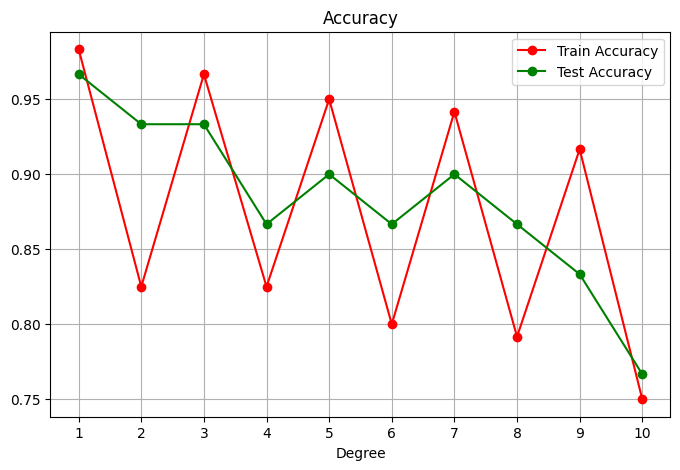

In [36]:

print(f'\tDegree','\t\t', f'| \tAccuracy_Train\t', f'| \tAccuracy_Test')
print(f'_________________________|_______________________|___________________________')
for degree, acc_trn, acc_tst in results:

    #print(f'Degree {degree}','\t', f'| \tAccuracy_Train = {acc_trn:.2f}', f'| \tAccuracy_Test = {acc_tst:.2f}')
    print(f'\t  {degree}','\t\t', f'| \t     {acc_trn:.2f}', f'\t |\t    {acc_tst:.2f}')

# Assuming accuracy_Train and accuracy_Test are already defined
degrees = range(1, len(accuracy_Train) + 1)

plt.figure(figsize=(8, 5))
plt.plot(degrees, accuracy_Train, 'r-o', label='Train Accuracy')
plt.plot(degrees, accuracy_Test, 'g-o', label='Test Accuracy')
plt.title('Accuracy')
plt.xlabel('Degree')
plt.legend()
plt.grid()

# Set the x-axis to start from 1
plt.xticks(degrees)

plt.show()

# Part4: SVM Classifier with Polynomail Kernal_From Scratch

In [20]:
def plot_decision_boundary(clf, X, y, title , save_path):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5, 5))
    plt.contourf(xx, yy, Z, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.savefig(save_path)
    plt.show()

In [21]:
import numpy as np

class SVM:
    def __init__(self, degree=3, C=1.0, tol=1e-3, max_passes=5):
        self.degree = degree
        self.C = C
        self.tol = tol
        self.max_passes = max_passes
        self.models = []

    def polynomial_kernel(self, x, y, degree, c=1):
        return (np.dot(x, y) + c) ** degree

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.models = []

        for cls in self.classes:
            y_binary = np.where(y == cls, 1, -1)
            model = self._train_binary_classifier(X, y_binary)
            self.models.append(model)

    def _train_binary_classifier(self, X, y):
        n_samples, n_features = X.shape
        alpha = np.zeros(n_samples)
        b = 0
        passes = 0

        while passes < self.max_passes:
            alpha_prev = np.copy(alpha)
            for i in range(n_samples):
                E_i = self._decision_function(X[i], X, y, alpha, b) - y[i]

                if (y[i] * E_i < -self.tol and alpha[i] < self.C) or (y[i] * E_i > self.tol and alpha[i] > 0):
                    j = np.random.choice([x for x in range(n_samples) if x != i])
                    E_j = self._decision_function(X[j], X, y, alpha, b) - y[j]

                    alpha_i_old, alpha_j_old = alpha[i], alpha[j]

                    if y[i] != y[j]:
                        L = max(0, alpha[j] - alpha[i])
                        H = min(self.C, self.C + alpha[j] - alpha[i])
                    else:
                        L = max(0, alpha[j] + alpha[i] - self.C)
                        H = min(self.C, alpha[j] + alpha[i])

                    if L == H:
                        continue

                    eta = 2 * self.polynomial_kernel(X[i], X[j], self.degree) - self.polynomial_kernel(X[i], X[i], self.degree) - self.polynomial_kernel(X[j], X[j], self.degree)
                    if eta >= 0:
                        continue

                    alpha[j] -= y[j] * (E_i - E_j) / eta
                    alpha[j] = np.clip(alpha[j], L, H)

                    if abs(alpha[j] - alpha_j_old) < 1e-5:
                        continue

                    alpha[i] += y[i] * y[j] * (alpha_j_old - alpha[j])

                    b1 = b - E_i - y[i] * (alpha[i] - alpha_i_old) * self.polynomial_kernel(X[i], X[i], self.degree) - y[j] * (alpha[j] - alpha_j_old) * self.polynomial_kernel(X[i], X[j], self.degree)
                    b2 = b - E_j - y[i] * (alpha[i] - alpha_i_old) * self.polynomial_kernel(X[i], X[j], self.degree) - y[j] * (alpha[j] - alpha_j_old) * self.polynomial_kernel(X[j], X[j], self.degree)

                    if 0 < alpha[i] < self.C:
                        b = b1
                    elif 0 < alpha[j] < self.C:
                        b = b2
                    else:
                        b = (b1 + b2) / 2

            diff = np.linalg.norm(alpha - alpha_prev)
            if diff < self.tol:
                passes += 1
            else:
                passes = 0

        return {'alpha': alpha, 'b': b, 'X': X, 'y': y}

    def _decision_function(self, x, X, y, alpha, b):
        return np.sum([alpha[i] * y[i] * self.polynomial_kernel(x, X[i], self.degree) for i in range(len(alpha))]) + b

    def predict(self, X):
        predictions = np.zeros((X.shape[0], len(self.models)))

        for i, model in enumerate(self.models):
            predictions[:, i] = [self._decision_function(x, model['X'], model['y'], model['alpha'], model['b']) for x in X]

        return self.classes[np.argmax(predictions, axis=1)]

if __name__ == "__main__":
  import os
  import numpy as np
  import pandas as pd
  from sklearn.model_selection import train_test_split
  from sklearn.svm import SVC
  from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
  from sklearn.decomposition import PCA
  import matplotlib.pyplot as plt
  import seaborn as sns
  import imageio


		SVM performance score Train set
		Accuracy : 0.77 %


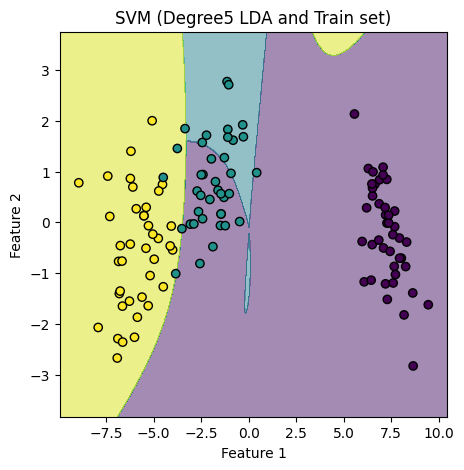

In [63]:
degree = 5
svm_poly = SVM(C=0.5, degree=degree)
clf = svm_poly
clf.fit(X_svc_trn, y_svc_trn)
y_pred_train = clf.predict(X_svc_trn)
SVM_score_lda_train = accuracy_score(y_train, y_pred_train)
print(f'\n\t\tSVM performance score Train set\n\t\tAccuracy : {SVM_score_lda_train :.2f} %')
plot_decision_boundary(clf, X_svc_trn, y_svc_trn, f'SVM (Degree{degree} LDA and Train set)', save_path = f'svm_poly_degree_{degree}_Train.png')

In [22]:
X_trn_sc_lda = lda_df.drop('target', axis=1).values
y_trn_sc_lda = lda_df['target'].values

X_svc_trn = X_trn_sc_lda
X_svc_tst = X_test_lda
y_svc_trn = y_trn_sc_lda
y_svc_tst = y_test


		SVM performance score Train set
		Accuracy : 0.95 %


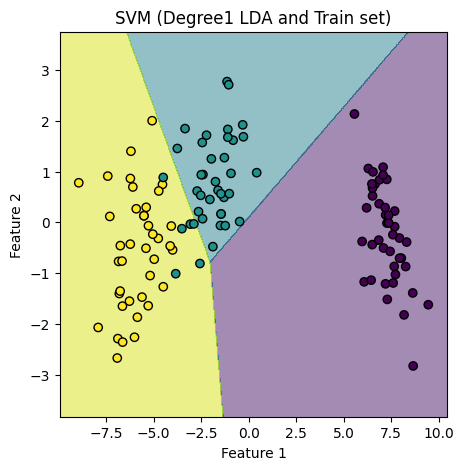

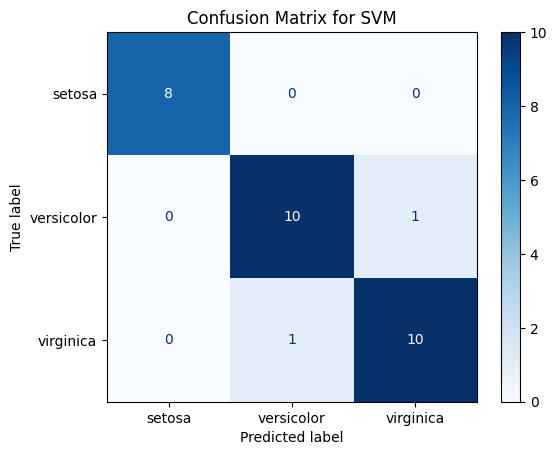

		SVM performance score Test set
		Accuracy : 0.93 %

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.91      0.91      0.91        11
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



<Figure size 640x480 with 0 Axes>

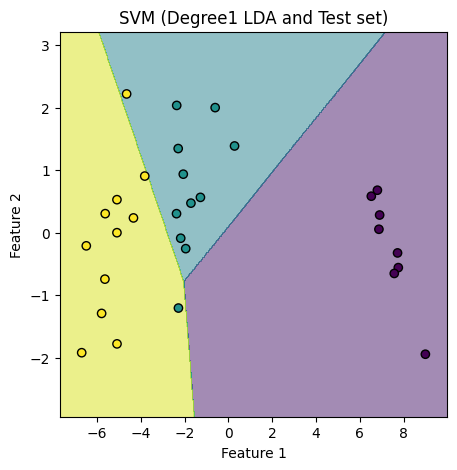


		SVM performance score Train set
		Accuracy : 0.99 %


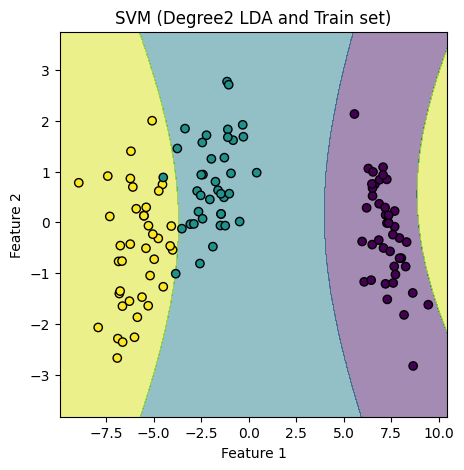

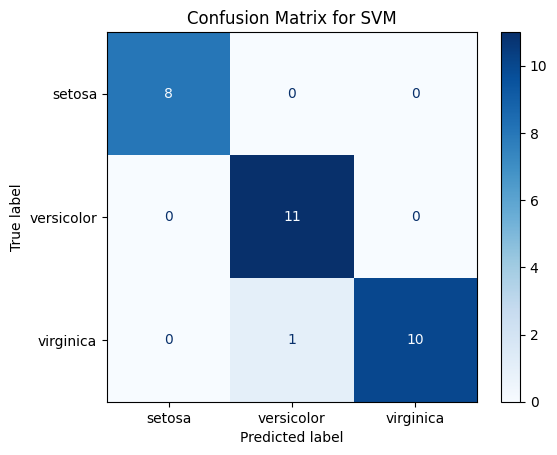

		SVM performance score Test set
		Accuracy : 0.97 %

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.92      1.00      0.96        11
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



<Figure size 640x480 with 0 Axes>

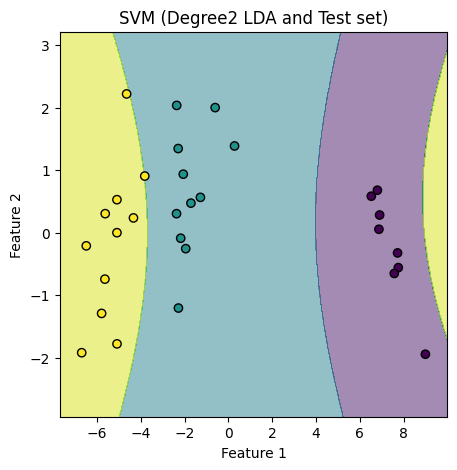


		SVM performance score Train set
		Accuracy : 0.98 %


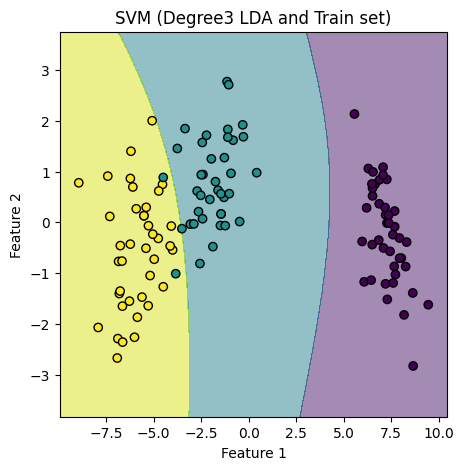

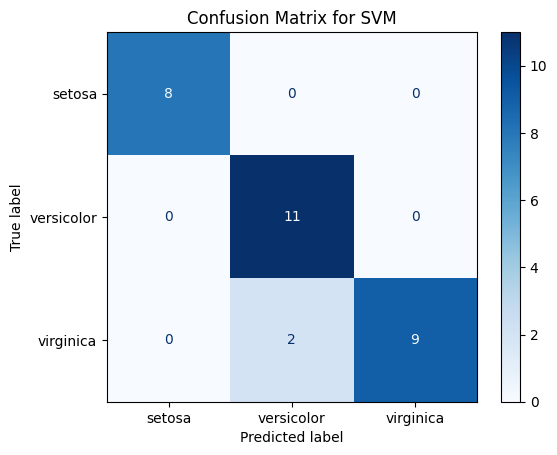

		SVM performance score Test set
		Accuracy : 0.93 %

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.85      1.00      0.92        11
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



<Figure size 640x480 with 0 Axes>

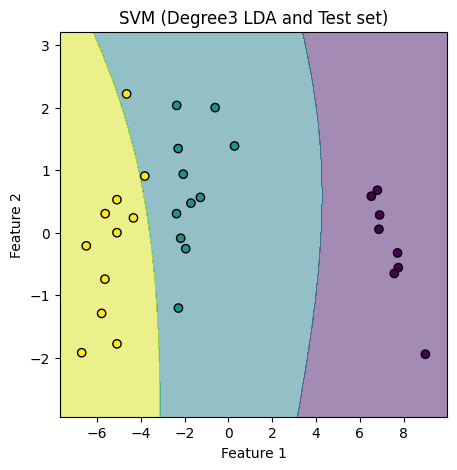


		SVM performance score Train set
		Accuracy : 0.85 %


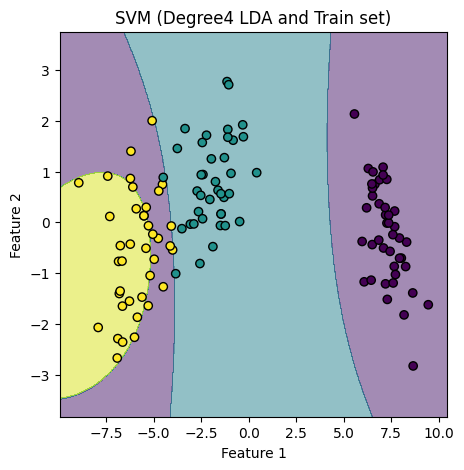

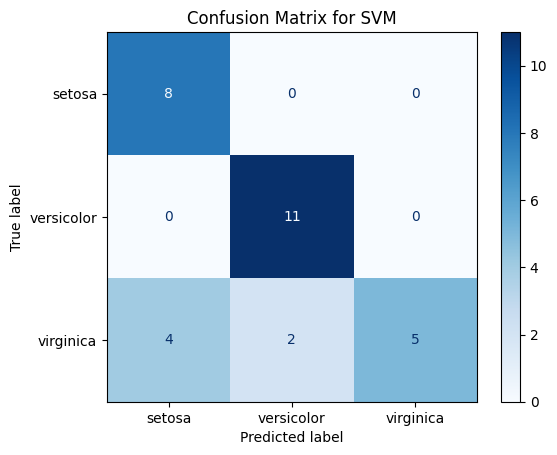

		SVM performance score Test set
		Accuracy : 0.80 %

Classification Report: 

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         8
           1       0.85      1.00      0.92        11
           2       1.00      0.45      0.62        11

    accuracy                           0.80        30
   macro avg       0.84      0.82      0.78        30
weighted avg       0.85      0.80      0.78        30



<Figure size 640x480 with 0 Axes>

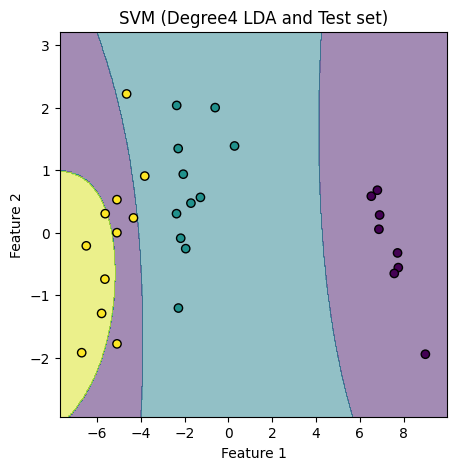


		SVM performance score Train set
		Accuracy : 0.98 %


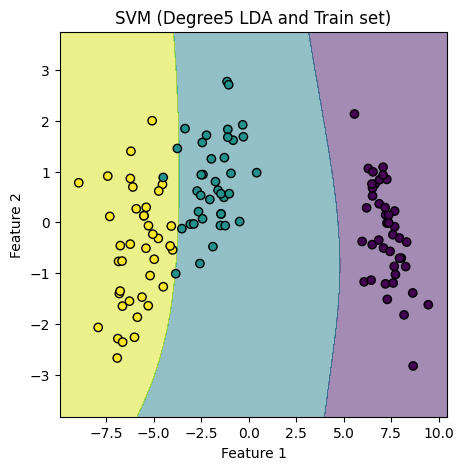

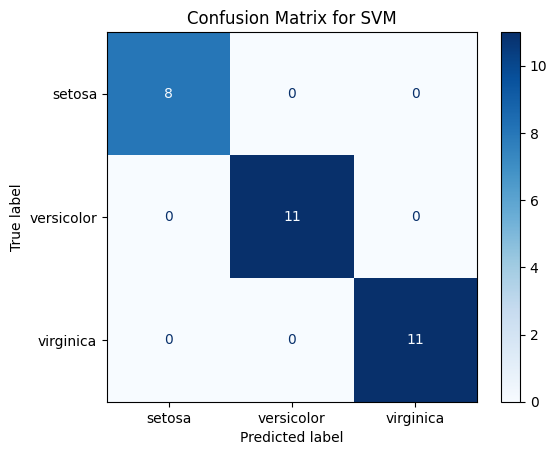

		SVM performance score Test set
		Accuracy : 1.00 %

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Figure size 640x480 with 0 Axes>

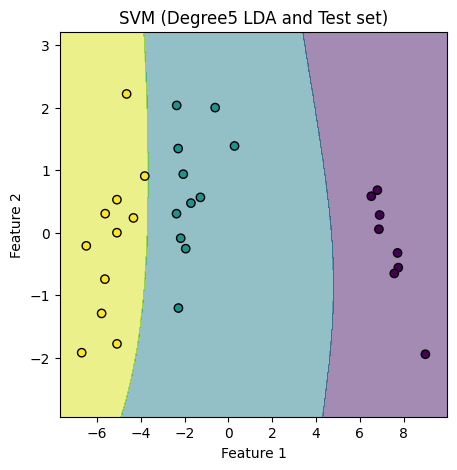


		SVM performance score Train set
		Accuracy : 0.73 %


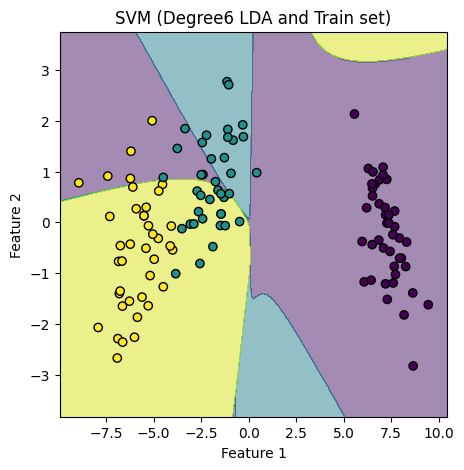

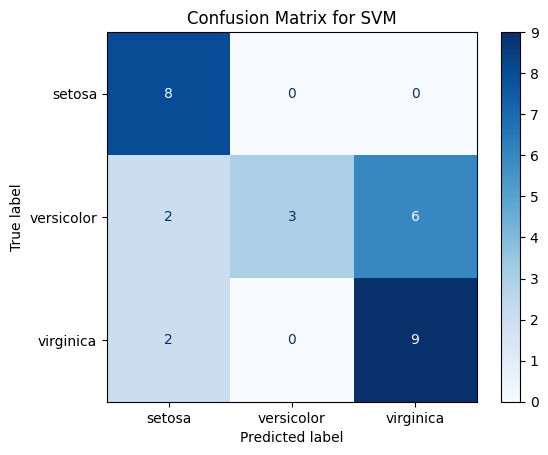

		SVM performance score Test set
		Accuracy : 0.67 %

Classification Report: 

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         8
           1       1.00      0.27      0.43        11
           2       0.60      0.82      0.69        11

    accuracy                           0.67        30
   macro avg       0.76      0.70      0.64        30
weighted avg       0.76      0.67      0.62        30



<Figure size 640x480 with 0 Axes>

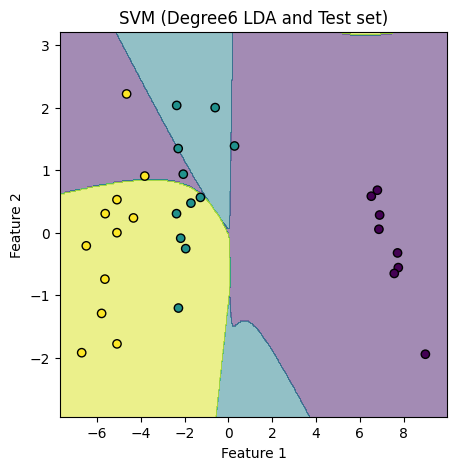


		SVM performance score Train set
		Accuracy : 0.73 %


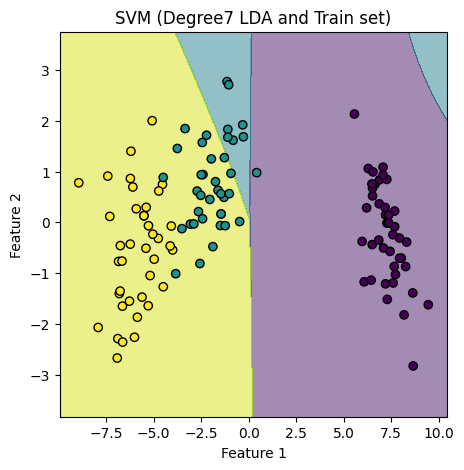

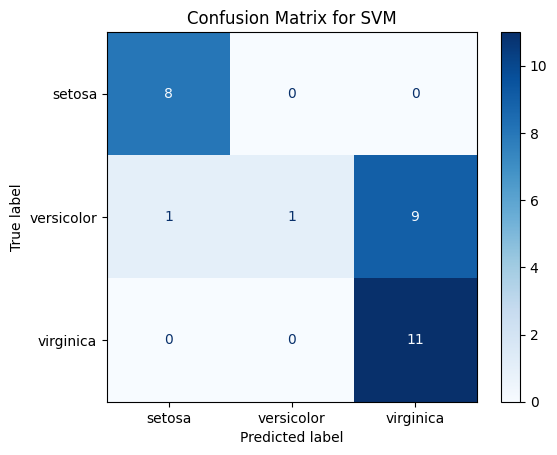

		SVM performance score Test set
		Accuracy : 0.67 %

Classification Report: 

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.09      0.17        11
           2       0.55      1.00      0.71        11

    accuracy                           0.67        30
   macro avg       0.81      0.70      0.61        30
weighted avg       0.81      0.67      0.57        30



<Figure size 640x480 with 0 Axes>

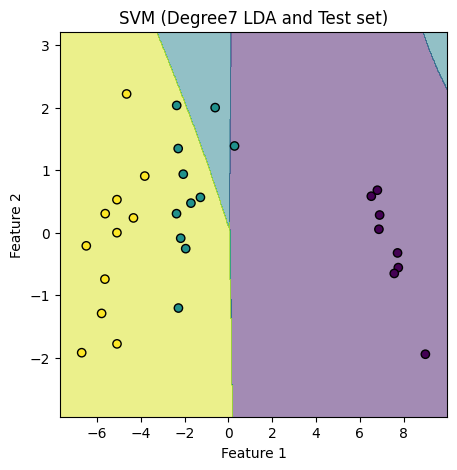


		SVM performance score Train set
		Accuracy : 0.50 %


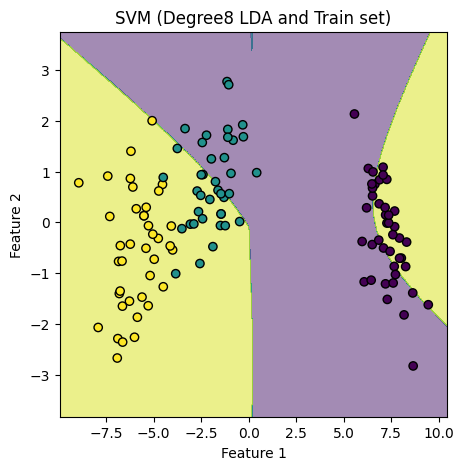

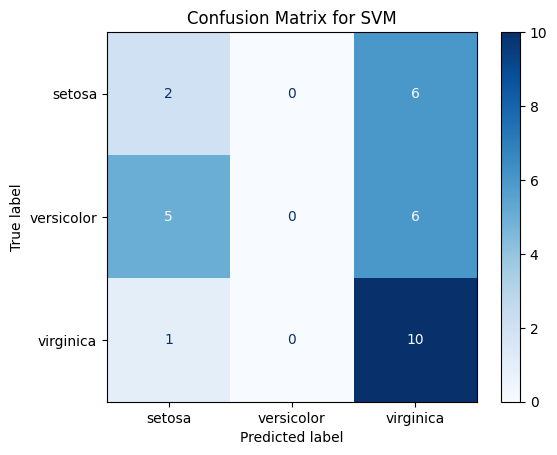

		SVM performance score Test set
		Accuracy : 0.40 %

Classification Report: 

              precision    recall  f1-score   support

           0       0.25      0.25      0.25         8
           1       0.00      0.00      0.00        11
           2       0.45      0.91      0.61        11

    accuracy                           0.40        30
   macro avg       0.23      0.39      0.29        30
weighted avg       0.23      0.40      0.29        30



<Figure size 640x480 with 0 Axes>

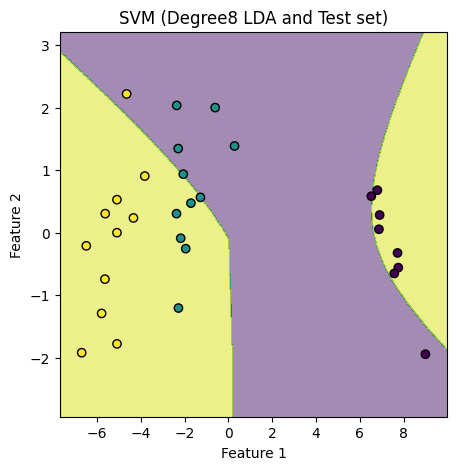


		SVM performance score Train set
		Accuracy : 0.73 %


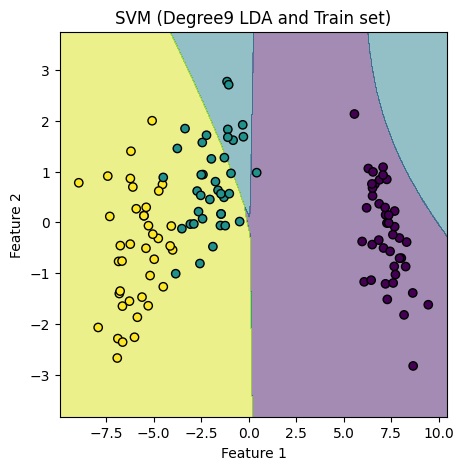

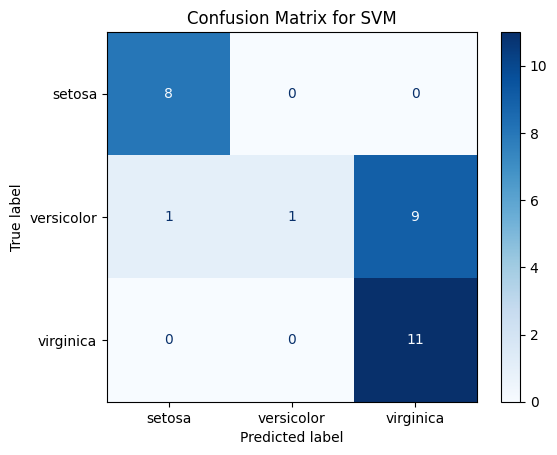

		SVM performance score Test set
		Accuracy : 0.67 %

Classification Report: 

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.09      0.17        11
           2       0.55      1.00      0.71        11

    accuracy                           0.67        30
   macro avg       0.81      0.70      0.61        30
weighted avg       0.81      0.67      0.57        30



<Figure size 640x480 with 0 Axes>

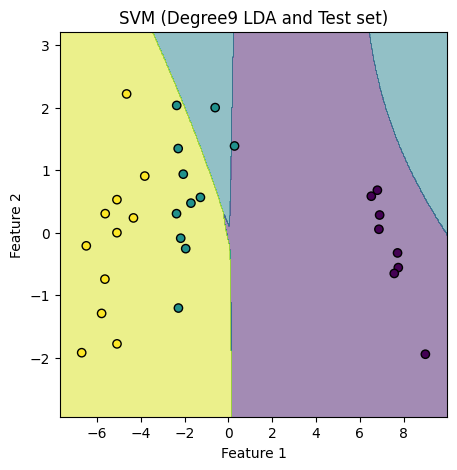


		SVM performance score Train set
		Accuracy : 0.69 %


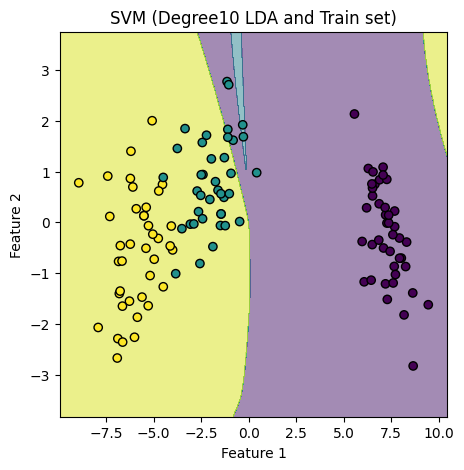

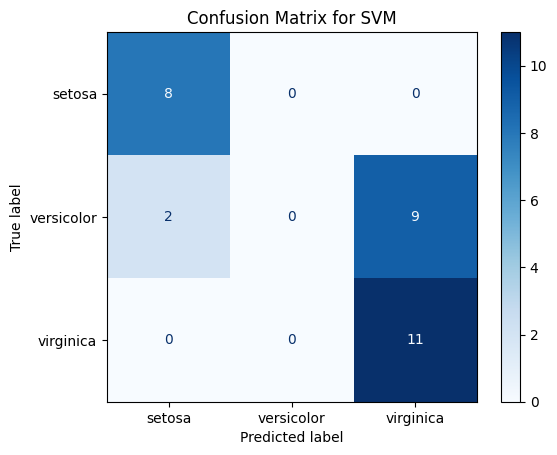

		SVM performance score Test set
		Accuracy : 0.63 %

Classification Report: 

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       0.00      0.00      0.00        11
           2       0.55      1.00      0.71        11

    accuracy                           0.63        30
   macro avg       0.45      0.67      0.53        30
weighted avg       0.42      0.63      0.50        30



<Figure size 640x480 with 0 Axes>

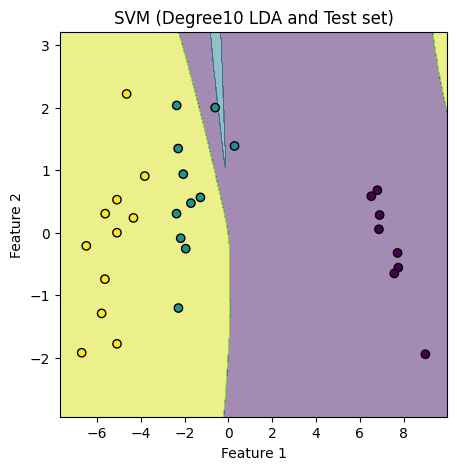

In [23]:
results = []
accuracy_Train = []
accuracy_Test = []


for degree in range(1, 11):
    #svm_poly = SVC(kernel = 'poly', C=0.5, degree=degree, random_state=random_state)
    svm_poly = SVM(C=1.0, degree= degree)
    svm_poly.fit(X_svc_trn, y_svc_trn)

    clf = svm_poly

    # Train part
    #SVM_score_lda_train = clf.score(X_svc_trn, y_svc_trn) # SVM performance score without Dimension Reduction
    y_pred_train = clf.predict(X_svc_trn)
    SVM_score_lda_train = accuracy_score(y_svc_trn, y_pred_train)
    print(f'\n\t\tSVM performance score Train set\n\t\tAccuracy : {SVM_score_lda_train :.2f} %')
    plot_decision_boundary(clf, X_svc_trn, y_svc_trn, f'SVM (Degree{degree} LDA and Train set)', save_path = f'svm_poly_degree_{degree}_Train.png')
    accuracy_Train.append(SVM_score_lda_train)

    # Test part
    y_pred_lda = clf.predict(X_svc_tst)
    cm = confusion_matrix(y_svc_tst, y_pred_lda)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix for SVM")
    plt.show()

    #SVM_score_lda_test = clf.score(X_svc_tst, y_svc_tst) # SVM performance score without Dimension Reduction
    SVM_score_lda_test = accuracy_score(y_svc_tst, y_pred_lda)
    print(f'\t\tSVM performance score Test set\n\t\tAccuracy : {SVM_score_lda_test :.2f} %')
    accuracy_Test.append(SVM_score_lda_test)

    print("\nClassification Report: \n")
    print(f'{classification_report(y_svc_tst,y_pred_lda)}')

    plt.figure()
    plot_decision_boundary(clf, X_svc_tst, y_svc_tst, f'SVM (Degree{degree} LDA and Test set)', save_path = f'svm_poly_degree_{degree}_Test.png')

    results.append((degree, SVM_score_lda_train, SVM_score_lda_test))


In [30]:
accuracy_Train_fromscratch = accuracy_Train.copy()
accuracy_Test_fromscratch = accuracy_Test.copy()

In [24]:
images_Train = []
images_Test = []
# Creating a list of durations (in seconds) for each frame
#durations = [1] * 50  # 1 second delay after each frame
durations = []

for degree in range(1, 11):
    images_Train.append(imageio.imread(f'svm_poly_degree_{degree}_Train.png'))
    durations.append(1)  # 1 second delay for each image
imageio.mimsave('svm_poly_kernels_Train.gif', images_Train, duration=durations)


for degree in range(1, 11):
    images_Test.append(imageio.imread(f'svm_poly_degree_{degree}_Test.png'))
imageio.mimsave('svm_poly_kernels_Test.gif', images_Test, duration=durations)

In [25]:
from PIL import Image, ImageSequence

images_Train = []
images_Test = []

for degree in range(1, 11):
    images_Train.append(Image.open(f'svm_poly_degree_{degree}_Train.png'))

for degree in range(1, 11):
    images_Test.append(Image.open(f'svm_poly_degree_{degree}_Test.png'))

# Create a new GIF with a duration for each frame
images_Train[0].save('svm_poly_kernels_Train.gif', save_all=True, append_images=images_Train[1:], duration=1000, loop=0)
images_Test[0].save('svm_poly_kernels_Test.gif', save_all=True, append_images=images_Test[1:], duration=1000, loop=0)

# The duration is set in milliseconds, so 1000 ms = 1 second

	Degree 		 | 	Accuracy_Train	 | 	Accuracy_Test
_________________________|_______________________|___________________________
	  1 		 | 	     0.95 	 |	    0.93
	  2 		 | 	     0.99 	 |	    0.97
	  3 		 | 	     0.98 	 |	    0.93
	  4 		 | 	     0.85 	 |	    0.80
	  5 		 | 	     0.98 	 |	    1.00
	  6 		 | 	     0.73 	 |	    0.67
	  7 		 | 	     0.73 	 |	    0.67
	  8 		 | 	     0.50 	 |	    0.40
	  9 		 | 	     0.73 	 |	    0.67
	  10 		 | 	     0.69 	 |	    0.63


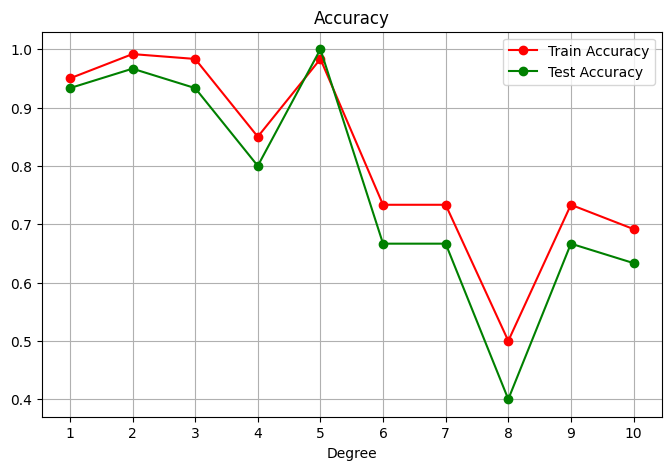

In [26]:
print(f'\tDegree','\t\t', f'| \tAccuracy_Train\t', f'| \tAccuracy_Test')
print(f'_________________________|_______________________|___________________________')
for degree, acc_trn, acc_tst in results:

    #print(f'Degree {degree}','\t', f'| \tAccuracy_Train = {acc_trn:.2f}', f'| \tAccuracy_Test = {acc_tst:.2f}')
    print(f'\t  {degree}','\t\t', f'| \t     {acc_trn:.2f}', f'\t |\t    {acc_tst:.2f}')

# Assuming accuracy_Train and accuracy_Test are already defined
degrees = range(1, len(accuracy_Train) + 1)

plt.figure(figsize=(8, 5))
plt.plot(degrees, accuracy_Train, 'r-o', label='Train Accuracy')
plt.plot(degrees, accuracy_Test, 'g-o', label='Test Accuracy')
plt.title('Accuracy')
plt.xlabel('Degree')
plt.legend()
plt.grid()

# Set the x-axis to start from 1
plt.xticks(degrees)

plt.show()

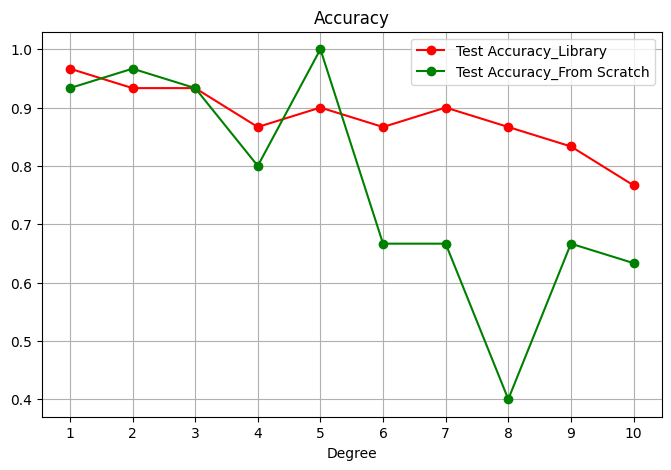

In [37]:
# Assuming accuracy_Train and accuracy_Test are already defined
degrees = range(1, len(accuracy_Train) + 1)

plt.figure(figsize=(8, 5))
plt.plot(degrees, accuracy_Test_lib, 'r-o', label='Test Accuracy_Library')
plt.plot(degrees, accuracy_Test_fromscratch, 'g-o', label='Test Accuracy_From Scratch')
plt.title('Accuracy')
plt.xlabel('Degree')
plt.legend()
plt.grid()

# Set the x-axis to start from 1
plt.xticks(degrees)

plt.show()

# Not important

In [ ]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


classifiers = [
    SVC(kernel='linear', C=0.5, random_state=random_state),
    SVC(kernel='linear', C=1, random_state=random_state),
    SVC(kernel='rbf', gamma='auto', C=0.5)
]

# Titles for the plots
titles = ['SVC with linear kernel',
          'SVC with linear kernel2',
          'SVC with RBF kernel'
]

fig, sub = plt.subplots(3, 1)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

X0, X1 = X_svc_trn[:, 0], X_svc_trn[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(classifiers, titles, sub.flatten()):
    clf.fit(X_svc_trn, y_svc_trn)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_svc_trn, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()


from scratch_Method2



In [1]:
import cvxopt
def linear_kernel( x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel( x, y, C=1.0, d=3):
    return (np.dot(x, y) + C) ** d

def gaussian_kernel( x, y, gamma=0.5):
    return np.exp(-gamma*np.linalg.norm(x - y) ** 2)

def sigmoid_kernel( x, y, alpha=1, C=0.01):
    a= alpha * np.dot(x, y) + C
    return np.tanh(a)

def SVM_scratch(X, X_t, y, C, kernel_type, poly_params=(1, 4), RBF_params=0.5, sigmoid_params=(1, 0.01)):
    kernel_and_params=(kernel_type,poly_params, RBF_params, sigmoid_params,C)
    n_samples, n_features = X.shape
    # Compute the Gram matrix
    K = np.zeros((n_samples, n_samples))
    if kernel_type == 'linear':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = linear_kernel(X[i], X[j])
    elif kernel_type == 'polynomial':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = polynomial_kernel(X[i], X[j], poly_params[0], poly_params[1])
    elif kernel_type == 'RBF':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = gaussian_kernel(X[i], X[j], RBF_params)
    elif kernel_type == 'sigmoid':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = sigmoid_kernel(X[i], X[j], sigmoid_params[0], sigmoid_params[1])
    else:
        raise ValueError("Invalid kernel type")

    # construct P, q, A, b, G, h matrices for CVXOPT
    P = cvxopt.matrix(np.outer(y, y) * K)
    q = cvxopt.matrix(np.ones(n_samples) * -1)
    A = cvxopt.matrix(y, (1, n_samples))
    b = cvxopt.matrix(0.0)
    G = cvxopt.matrix(np.vstack((np.diag(np.ones(n_samples) * -1), np.identity(n_samples))))
    h = cvxopt.matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))
    # solve QP problem
    cvxopt.solvers.options['show_progress'] = False
    solution = cvxopt.solvers.qp(P, q, G, h, A, b)
    # Lagrange multipliers
    a = np.ravel(solution['x'])
    # Support vectors have non zero lagrange multipliers
    sv = a > 1e-5  # some small threshold

    ind = np.arange(len(a))[sv]
    a = a[sv]
    sv_x = X[sv]
    sv_y = y[sv]
    numbers_of_sv=len(sv_y)
    # Bias (For linear it is the intercept):
    bias = 0
    for n in range(len(a)):
        # For all support vectors:
        bias += sv_y[n]
        bias -= np.sum(a * sv_y * K[ind[n], sv])
    bias = bias / (len(a)+0.0001)

    if kernel_type == 'linear':
        w = np.zeros(n_features)
        for n in range(len(a)):
            w += a[n] * sv_y[n] * sv_x[n]
    else:
        w = None

    y_pred=0
    if w is not None:
        y_pred = np.sign(np.dot(X_t, w) + bias)
    else:
        y_predict = np.zeros(len(X_t))
        for i in range(len(X_t)):
            s = 0
            for a1, sv_y1, sv1 in zip(a ,sv_y, sv_x):
                # a : Lagrange multipliers, sv : support vectors.
                # Hypothesis: sign(sum^S a * y * kernel + b)

                if kernel_type == 'linear':
                    s += a1 * sv_y1 * linear_kernel(X_t[i], sv1)
                if kernel_type=='RBF':
                    s += a1 * sv_y1 * gaussian_kernel(X_t[i], sv1, RBF_params)   # Kernel trick.
                if kernel_type == 'polynomial':
                    s += a1 * sv_y1 * polynomial_kernel(X_t[i], sv1, poly_params[0], poly_params[1])
                if kernel_type == 'sigmoid':
                    s=+ a1 * sv_y1 *sigmoid_kernel( X_t[i],  sv1, sigmoid_params[0], sigmoid_params[1])
            y_predict[i] = s
        y_pred = np.sign(y_predict + bias)

    return w, bias, solution,a, sv_x, sv_y, y_pred, kernel_and_params



def multiclass_svm(X, X_t, y, C, kernel_type, poly_params=(1, 4), RBF_params=0.5, sigmoid_params=(1, 0.01)):
    class_labels = list(set(y))

    classifiers = {}
    w_catch = {}  # catching w, b only for plot part
    b_catch = {}
    a_catch = {}
    sv_x_catch = {}
    sv_y_catch = {}

    for i, class_label in enumerate(class_labels):
        binary_y = np.where(y == class_label, 1.0, -1.0)
        w, bias, solution, a, sv_x, sv_y, prediction, kernel_and_params = SVM_scratch(X, X_t, binary_y, C, kernel_type, poly_params, RBF_params, sigmoid_params)
        classifiers[class_label] = (w, bias, a, sv_x, sv_y, kernel_and_params)
        w_catch[class_label] = w
        b_catch[class_label] = bias
        a_catch[class_label] = a
        sv_x_catch[class_label] = sv_x
        sv_y_catch[class_label] = sv_y

    def decision_function(X_t):
        decision_scores = np.zeros((X_t.shape[0], len(class_labels)))
        for i, label in enumerate(class_labels):
            w, bias, a, sv_x, sv_y, kernel_and_params = classifiers[label]
            if w is not None:
                decision_scores[:, i] = np.dot(X_t, w) + bias
            else:
                decision_values = np.zeros(X_t.shape[0])
                for j in range(X_t.shape[0]):
                    s = 0
                    for a1, sv_y1, sv1 in zip(a, sv_y, sv_x):
                        if kernel_type == 'linear':
                            s += a1 * sv_y1 * linear_kernel(X_t[j], sv1)
                        elif kernel_type == 'RBF':
                            s += a1 * sv_y1 * gaussian_kernel(X_t[j], sv1, RBF_params)
                        elif kernel_type == 'polynomial':
                            s += a1 * sv_y1 * polynomial_kernel(X_t[j], sv1, poly_params[0], poly_params[1])
                        elif kernel_type == 'sigmoid':
                            s += a1 * sv_y1 * sigmoid_kernel(X_t[j], sv1, sigmoid_params[0], sigmoid_params[1])
                    decision_values[j] = s
                decision_scores[:, i] = decision_values + bias
        return np.argmax(decision_scores, axis=1), kernel_and_params, w_catch, b_catch, classifiers

    return decision_function(X_t)

def visualize_multiclass_classification1(X_train, y_train1, kernel_type, trainset, classifiers, class_labels, w_stack, b_stack,save_path_scr, epsilon=1e-10):
    plt.figure(figsize=(6, 4))
    for i, target_name in enumerate(class_labels):
        plt.scatter(X_train[y_train1 == i, 0], X_train[y_train1 == i, 1], label=target_name)

    if kernel_type == 'linear':
        for i in range(len(class_labels)):
            w = w_stack[i]
            bias = b_stack[i]
            x_points = np.linspace(np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1, 200)
            y_points = -(w[0] / (w[1] + epsilon)) * x_points - bias / (w[1] + epsilon)
            plt.plot(x_points, y_points, c='r', label='Decision Boundary')

    elif kernel_type == 'polynomial':
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
        Z = np.zeros(xx.shape)
        for i in range(len(class_labels)):
            Z = np.zeros(xx.shape)
            for j in range(xx.shape[0]):
                for k in range(xx.shape[1]):
                    sample_point = np.array([xx[j, k], yy[j, k]])
                    decision_value = 0
                    w, bias, a, sv_x, sv_y, kernel_and_params = classifiers[i]
                    for a1, sv_y1, sv1 in zip(a, sv_y, sv_x):
                        decision_value += a1 * sv_y1 * polynomial_kernel(sample_point, sv1, C=kernel_and_params[1][0], d=kernel_and_params[1][1])
                    decision_value += bias
                    Z[j, k] = decision_value
            plt.contour(xx, yy, Z, levels=[0], colors='r')

    if trainset:
        plt.title('Data Points')
    else:
        plt.title('Data Points on Test Set')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.xlim(np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1)
    plt.ylim(np.min(X_train[:, 1]) - 1, np.max(X_train[:, 1]) + 1)
    plt.savefig(save_path_scr)
    plt.show()

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    accuracies = []
from sklearn.metrics import accuracy_score
for degree in range(1, 11):
    print(f"Training with polynomial degree {degree}")
    predictions, kernel_and_params, w_catch, b_catch, classifiers = multiclass_svm(
        X_reduced_train, X_reduced_test, y_train, C=1.0, kernel_type='polynomial', poly_params=(1.0, degree)
    )
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
    print(f"Degree: {degree}, Accuracy: {accuracy}")

    visualize_multiclass_classification1(X_reduced_train, y_train, 'polynomial', True, classifiers, np.unique(y_train), w_catch, b_catch , save_path_scr = f'polynum_scratch_degree{degree}')

#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
import imageio

images_scr = []
for degree in range(1, 11):
    images_scr.append(imageio.imread(f'/content/polynum_scratch_degree{degree}.png'))
imageio.mimsave('svm_poly_scratch_kernels.gif', images_scr, duration=1)
print("GIF saved as 'svm_poly_scratch_kernels.gif'")
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
accuracy_scr = []
for degree , acc in results:
  accuracy_scr.append(acc)
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
# comparing results
for i in range(10):
  print(f'accuracy in degree{i+1}:\n sklearn_model:{accuracy_scr[i]} and our model:{accuracies[i]}')

## Comments

In [ ]:
'''
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)
'''

In [ ]:
'''
def plot_svm_decision_boundary(clf, X, y):
    # Create a mesh to plot the decision boundary
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary
    plt.subplot(1, 1, 1)
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    Z = clf.decision_function(xy)

    # Check the shape of the decision function output
    if Z.ndim > 1:
        # Multi-class case: Take the maximum value across the decision functions
        Z = Z.max(axis=1)

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

    # Plot the support vectors
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
                facecolors='none', edgecolors='k', linewidths=1.5)

    # Plot the decision boundary and margins
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy)

    if Z.ndim > 1:
        # Multi-class case: Take the maximum value across the decision functions
        Z = Z.max(axis=1)

    Z = Z.reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'SVM with {clf.kernel.capitalize()} Kernel')
    plt.show()

# Example: clf = SVC(kernel='rbf').fit(X_svc_trn, y_svc_trn)
'''

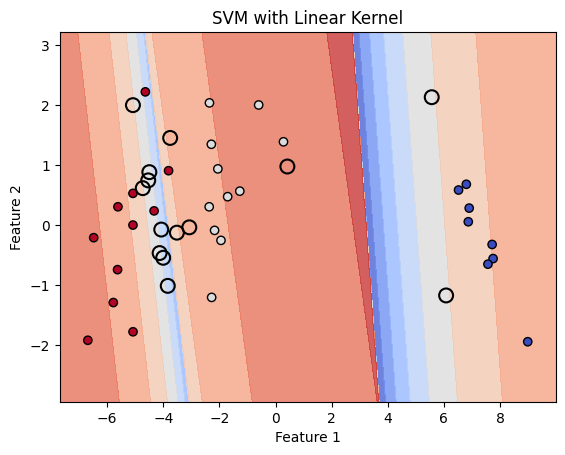

In [ ]:
#plot_svm_decision_boundary(clf, X_svc_tst, y_svc_tst)

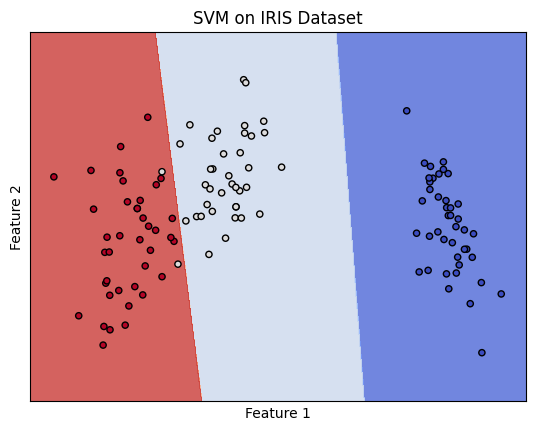

In [ ]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Create a new figure and axis
fig, ax = plt.subplots()



# Assuming X_svc_trn is a numpy array, if it's a DataFrame, convert it to numpy array
X_svc_trn_array = X_svc_trn.to_numpy() if isinstance(X_svc_trn, pd.DataFrame) else X_svc_trn



# Extract the first and second columns from X_svc_trn_array
X0, X1 = X_svc_trn_array[:, 0], X_svc_trn_array[:, 1]

# Create meshgrid
xx, yy = make_meshgrid(X0, X1)

#clf = SVC(kernel='linear', C=0.5, random_state=random_state)

# Plot contours
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

# Scatter plot of training points
ax.scatter(X0, X1, c=y_svc_trn, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('SVM on IRIS Dataset')

# Show the plot
plt.show()


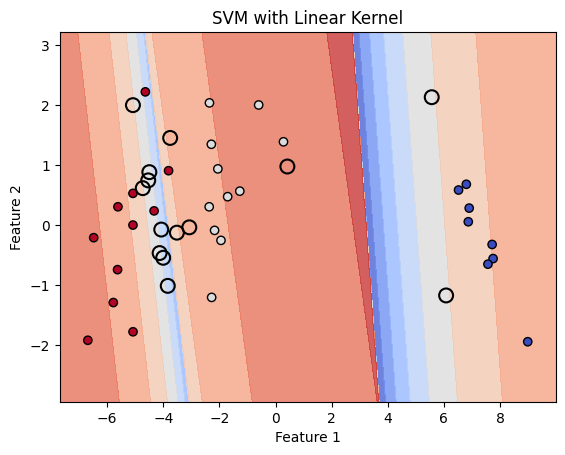

In [ ]:
def plot_svm_decision_boundary(clf, X, y):
    # Create a mesh to plot the decision boundary
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary
    plt.subplot(1, 1, 1)
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    Z = clf.decision_function(xy)

    # Check the shape of the decision function output
    if Z.ndim > 1:
        # Multi-class case: Take the maximum value across the decision functions
        Z = Z.max(axis=1)

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

    # Plot the support vectors
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
                facecolors='none', edgecolors='k', linewidths=1.5)

    # Plot the decision boundary and margins
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy)

    if Z.ndim > 1:
        # Multi-class case: Take the maximum value across the decision functions
        Z = Z.max(axis=1)

    Z = Z.reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'SVM with {clf.kernel.capitalize()} Kernel')
    plt.show()

# Example: clf = SVC(kernel='rbf').fit(X_svc_trn, y_svc_trn)
#clf = SVC(kernel='rbf').fit(X_svc_trn, y_svc_trn)
plot_svm_decision_boundary(clf, X_svc_tst, y_svc_tst)


In [ ]:
'''
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
data1
data1.head()
data1.info()
data1.describe()
'''

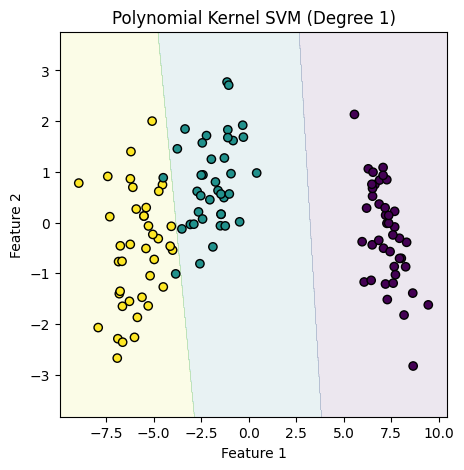

In [ ]:
def plot_decision_boundary(svm_model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5, 5))
    plt.contourf(xx, yy, Z, alpha=0.1)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plot_decision_boundary(clf, X_svc_trn, y_svc_trn, 'Polynomial Kernel SVM (Degree 1)')
#plot_decision_boundary(svm_poly2, X, y, 'Polynomial Kernel SVM (Degree 2)')
plt.show()